# Trimester-specific cis-e/sQTL

In [1]:
library(tidyverse)
library(data.table)
library(VennDiagram)
library(ggsignif)
library(ggsci)
library(ggpubr)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘hms’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: grid

Loading required package: futile.logger


Attaching package: ‘ggpubr’


The following object is masked from ‘package:VennDiagram’:

    rotate




### Gene expression along development

In [2]:
meta <- read.table("../metadata_654.tsv", header = T)
head(meta)

,Subject,Age,Sex,inferSex,trimester,ancestry,study
,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>
1,HSB100,-0.4027397,F,F,2,afr,werling
2,HSB152,-0.4602740,M,M,2,eur,werling
3,HSB195,-0.4219178,M,M,2,eur,werling
4,HSB221,-0.4027397,F,F,2,amr,werling
5,HSB222,-0.4823288,F,F,2,eur,werling
6,HSB238,-0.4794521,F,F,2,amr,werling


In [3]:
meta <- meta %>% arrange(Age)

In [4]:
exp <- fread("../data/genes.629.bed.gz", data.table = F)

In [5]:
meta <- meta %>% filter(Subject %in% colnames(exp))

In [6]:
exp_df <- exp %>% select(ID, meta$Subject)
head(exp_df)

,ID,11903,11837,11840,11397,11513,11321,11395,11931,HSB272,...,1775,RNAID1945,RNAID1974,Br2415,HSB619,HSB650,HSB332,HSB411,HSB652,Br1797
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000223972,3.836865,1.795879,3.680088,4.465360,4.388715,3.773329,3.673015,2.951040,3.738348,...,2.887400,3.317065,2.428890,1.377298,2.573353,2.573353,2.573353,4.965837,2.573353,3.421187
2,ENSG00000243485,1.739895,2.951929,1.739895,1.739895,3.706396,1.739895,3.298457,3.526413,4.306216,...,3.631644,2.019259,3.750081,1.733957,2.028727,2.028727,2.028727,4.639369,2.028727,1.733957
3,ENSG00000227232,7.179650,7.561024,8.646130,8.113387,8.701311,7.357331,8.612711,7.593766,8.088228,...,7.821153,9.206059,7.946529,7.419320,9.235555,8.592776,7.879914,8.632878,7.297137,8.078888
4,ENSG00000237613,2.993636,4.543609,5.341926,2.993636,2.993636,2.993636,2.993636,2.993636,2.531246,...,3.499214,3.040140,2.645839,2.893995,4.925611,4.343334,4.283034,3.833964,2.531246,2.893995
5,ENSG00000239945,2.157703,3.592829,2.157703,2.157703,2.157703,2.157703,3.388762,4.164789,2.236655,...,1.850485,1.850485,1.850485,2.806606,2.236655,2.236655,5.246235,4.829630,2.236655,1.835816
6,ENSG00000233750,4.583985,4.112462,4.038137,4.640229,4.955871,5.305372,3.743227,4.300498,4.669915,...,3.036160,4.796924,4.160272,2.527511,5.494091,5.115890,4.786368,4.644684,4.815703,4.890891


In [7]:
exp_1 <- exp_df %>% select(ID, meta[meta$trimester == "1","Subject"])
exp_2 <- exp_df %>% select(ID, meta[meta$trimester == "2","Subject"])

In [8]:
df_1 <- data.frame(rowMeans(exp_1[,-1]))
df_2 <- data.frame(rowMeans(exp_2[,-1]))

In [9]:
df <- cbind(df_1, df_2)
colnames(df) <- c("mean_expr_tri1", "mean_expr_tri2")

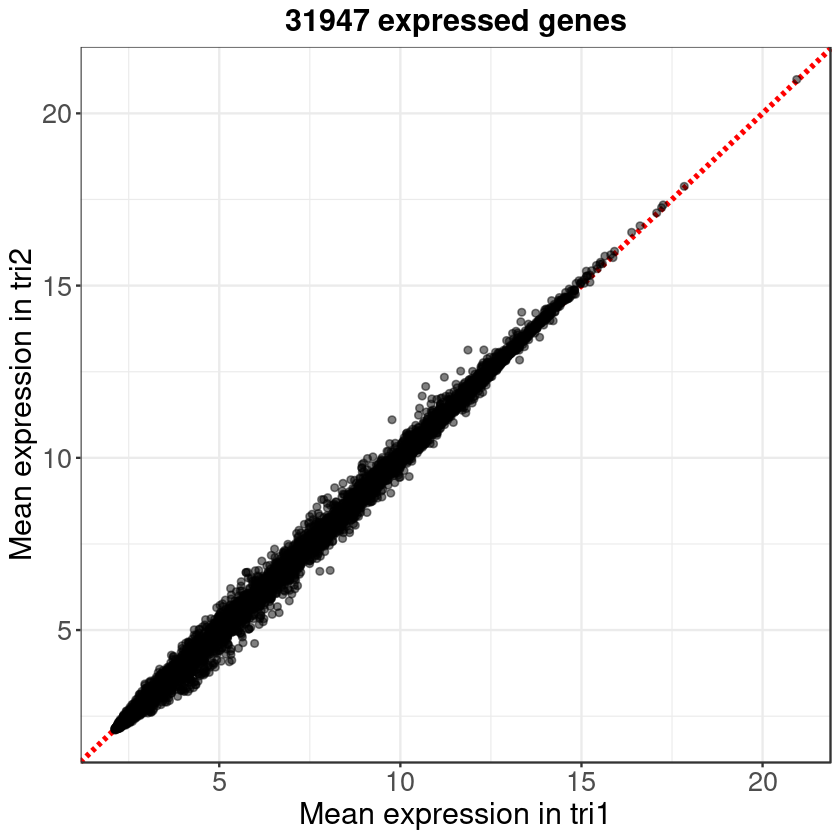

In [11]:
ggplot(df, aes(x = mean_expr_tri1, y = mean_expr_tri2)) +
    geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed", size = 1.2) +
    geom_point(alpha = 0.5) +
    theme_bw() +
    ggtitle("31947 expressed genes") +
    labs(x = "Mean expression in tri1", y = "Mean expression in tri2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) 

In [12]:
ggsave("../figures/mean_expr_tri.pdf", height = 6, width = 6)

In [14]:
# permutation eGenes
# head(tri1)
tri1_only <- setdiff(unique(tri1$pid), unique(tri2$pid))
length(tri1_only)
tri2_only <- setdiff(unique(tri2$pid), unique(tri1$pid))
length(tri2_only)

[1] 2950

[1] 959

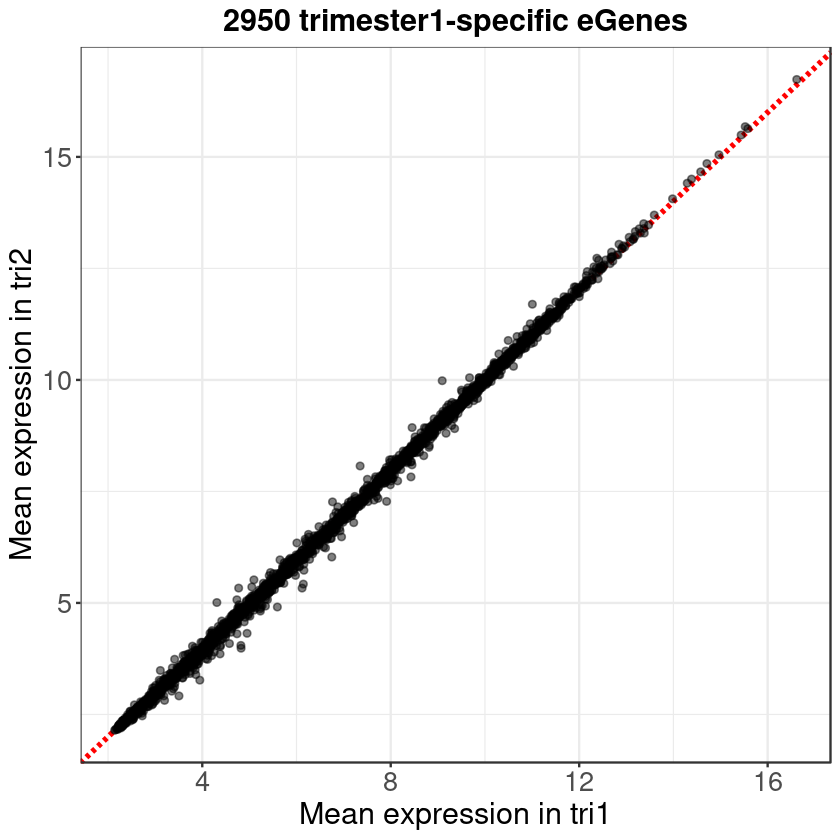

In [16]:
exp_1_tri1only <- exp_1 %>% filter(ID %in% tri1_only)
exp_2_tri1only <- exp_2 %>% filter(ID %in% tri1_only)
df_1 <- data.frame(rowMeans(exp_1_tri1only[,-1]))
df_2 <- data.frame(rowMeans(exp_2_tri1only[,-1]))
df <- cbind(df_1, df_2)
colnames(df) <- c("mean_expr_tri1", "mean_expr_tri2")
ggplot(df, aes(x = mean_expr_tri1, y = mean_expr_tri2)) +
    geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed", size = 1.2) +
    geom_point(alpha = 0.5) +
    theme_bw() +
    ggtitle("2950 trimester1-specific eGenes") +
    labs(x = "Mean expression in tri1", y = "Mean expression in tri2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) 
ggsave("../figures/mean_expr_tri1.pdf", height = 6, width = 6)

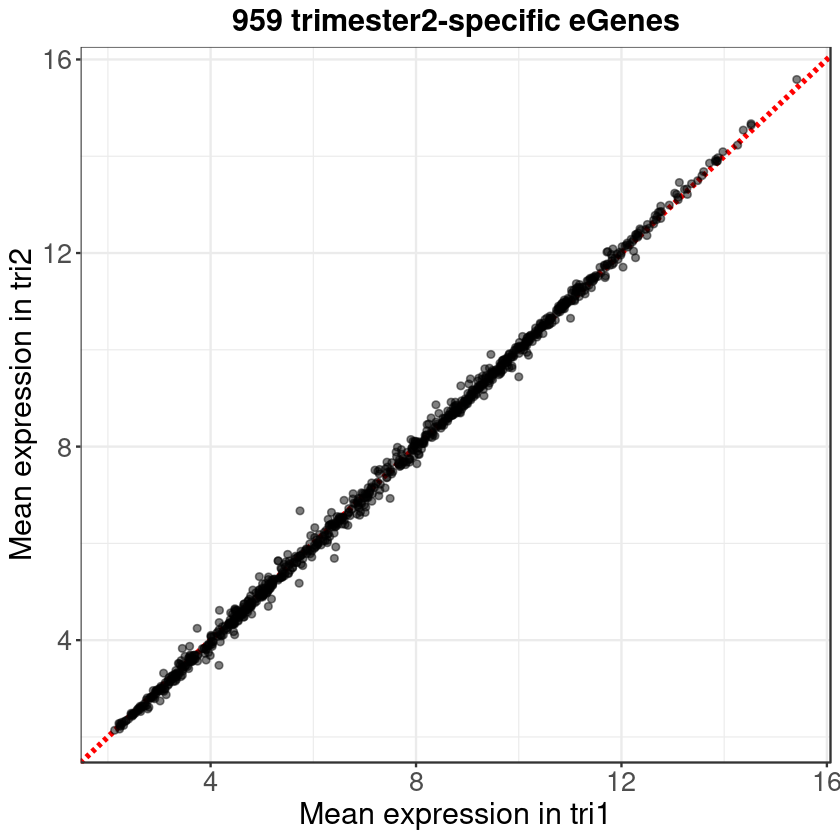

In [17]:
exp_1_tri2only <- exp_1 %>% filter(ID %in% tri2_only)
exp_2_tri2only <- exp_2 %>% filter(ID %in% tri2_only)
df_1 <- data.frame(rowMeans(exp_1_tri2only[,-1]))
df_2 <- data.frame(rowMeans(exp_2_tri2only[,-1]))
df <- cbind(df_1, df_2)
colnames(df) <- c("mean_expr_tri1", "mean_expr_tri2")
ggplot(df, aes(x = mean_expr_tri1, y = mean_expr_tri2)) +
    geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed", size = 1.2) +
    geom_point(alpha = 0.5) +
    theme_bw() +
    ggtitle("959 trimester2-specific eGenes") +
    labs(x = "Mean expression in tri1", y = "Mean expression in tri2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) 
ggsave("../figures/mean_expr_tri2.pdf", height = 6, width = 6)

### 1: HCP titration

In [3]:
results <- read.csv("../data/eur/chuanjiao/hcps-plots.csv")

In [4]:
colnames(results)[3] <- "Group"
results[1:10,3] <- "EUR trimester 1, n=137"
results[11:20,3] <- "EUR trimester 2, n=141"

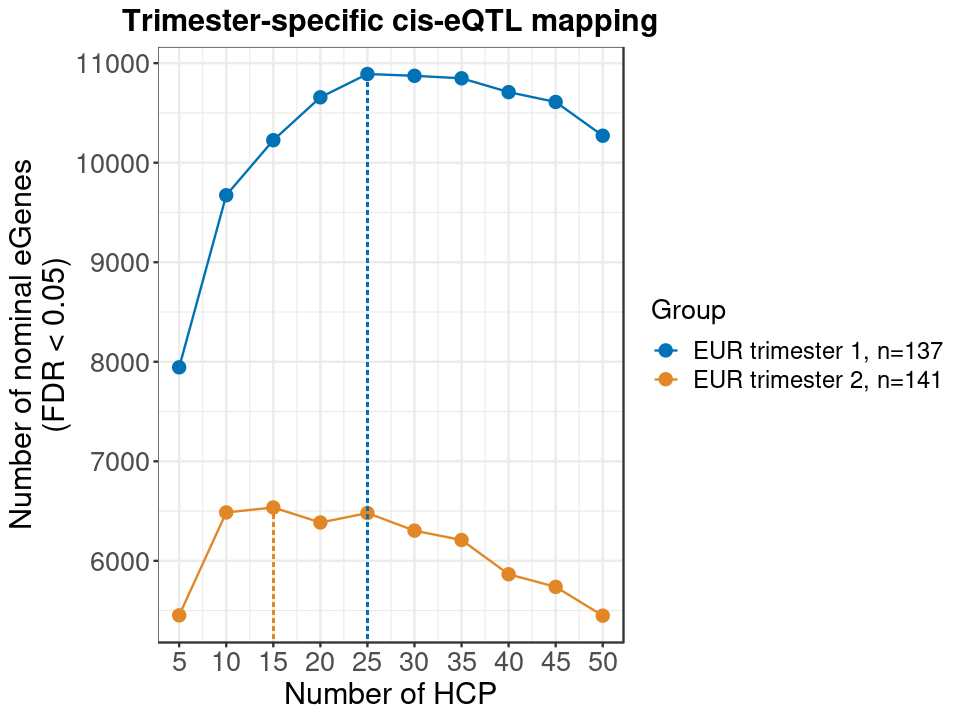

In [12]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(results, aes(x = X, y = value, color = Group)) +
    geom_point(size = 3) +
    geom_line() +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    geom_segment(x = 15, y = 0, xend = 15, yend = 6536, color = "#E18727FF", linetype = "dashed") +
    geom_segment(x = 25, y = 0, xend = 25, yend = 10891, color = "#0072B5FF", linetype = "dashed") +
    labs(x = "Number of HCP", y = "Number of nominal eGenes\n(FDR < 0.05)",
         title = "Trimester-specific cis-eQTL mapping") +
    theme_bw() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF"))

In [13]:
ggsave("../figures/tri_nominal.pdf", width = 8, height = 6)

In [14]:
df_1 <- data.frame("HCP" = seq(5, 50, 5),
                   "Count" = NA)
for (i in seq(5, 50, 5)) {
    df_1[i/5, "Count"] <- read.table(paste0("../../sqtl_new/results/tri1_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}
df_2 <- data.frame("HCP" = seq(5, 50, 5),
                   "Count" = NA)
for (i in seq(5, 50, 5)) {
    df_2[i/5, "Count"] <- read.table(paste0("../../sqtl_new/results/tri2_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}

In [15]:
df <- rbind(df_1, df_2)
df$Group <- c(rep("EUR trimester 1, n=141", 10), rep("EUR trimester 2, n=143", 10))

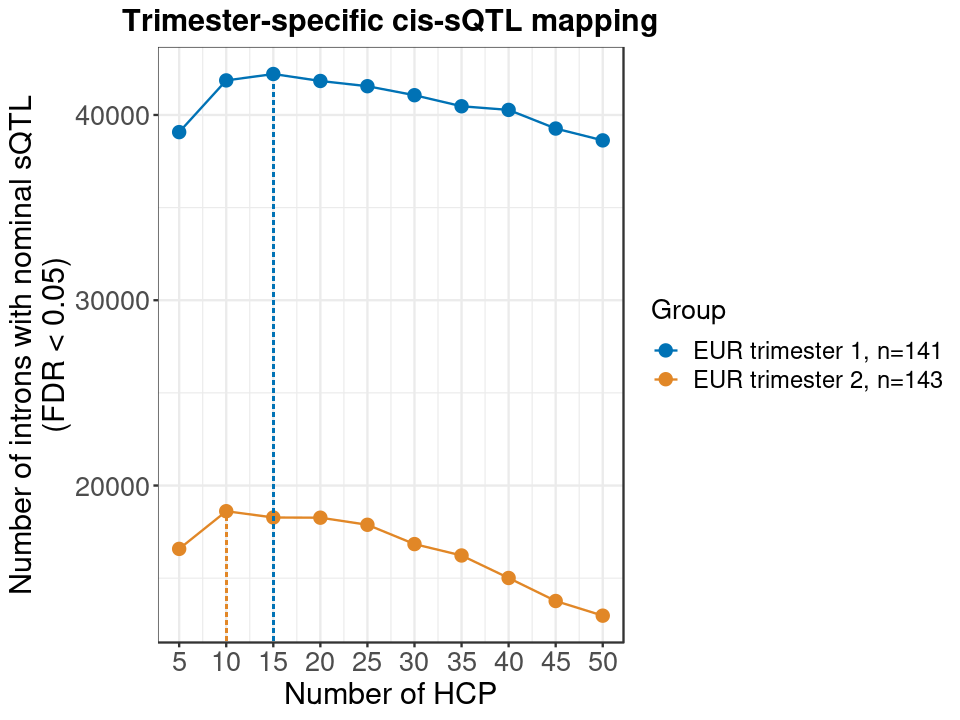

In [17]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(df, aes(x = HCP, y = Count, color = Group)) +
    geom_point(size = 3) +
    geom_line() +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    geom_segment(x = 15, y = 0, xend = 15, yend = 42210, color = "#0072B5FF", linetype = "dashed") +
    geom_segment(x = 10, y = 0, xend = 10, yend = 18614, color = "#E18727FF", linetype = "dashed") +
    labs(x = "Number of HCP", y = "Number of introns with nominal sQTL\n(FDR < 0.05)",
         title = "Trimester-specific cis-sQTL mapping") +
    theme_bw() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF"))

In [18]:
ggsave("../../sqtl_new/figures/tri_nominal_sqtl.pdf", width = 8, height = 6)

### 2: e/sGene comparison

**2-1: eQTL, eGene overlap**

In [13]:
tri1 <- fread("../results/eur_trimester/sig_pheno_trimester1.txt", data.table = F)
tri2 <- fread("../results/eur_trimester/sig_pheno_trimester2.txt", data.table = F)

In [3]:
bulk <- fread("../results/mixed_perm_90hcp/sig_pheno.txt", data.table = F)

In [4]:
length(unique(bulk$pid)) #n1

[1] 10094

In [5]:
sum(unique(bulk$pid) %in% unique(tri1$pid)) #n12
sum(unique(tri1$pid) %in% unique(tri2$pid)) #n23
sum(unique(bulk$pid) %in% unique(tri2$pid)) #n13
length(Reduce(intersect, list(unique(bulk$pid),
                              unique(tri1$pid),
                              unique(tri2$pid)))) #n123

[1] 3080

[1] 1261

[1] 1757

[1] 1232

In [20]:
sum(unique(tri1$pid) %in% unique(tri2$pid))
length(unique(tri1$pid)) #n2
length(unique(tri2$pid)) #n3
dim(tri1)
dim(tri2)

[1] 1261

[1] 4211

[1] 2220

[1] 4211   13

[1] 2220   13

png 
  2

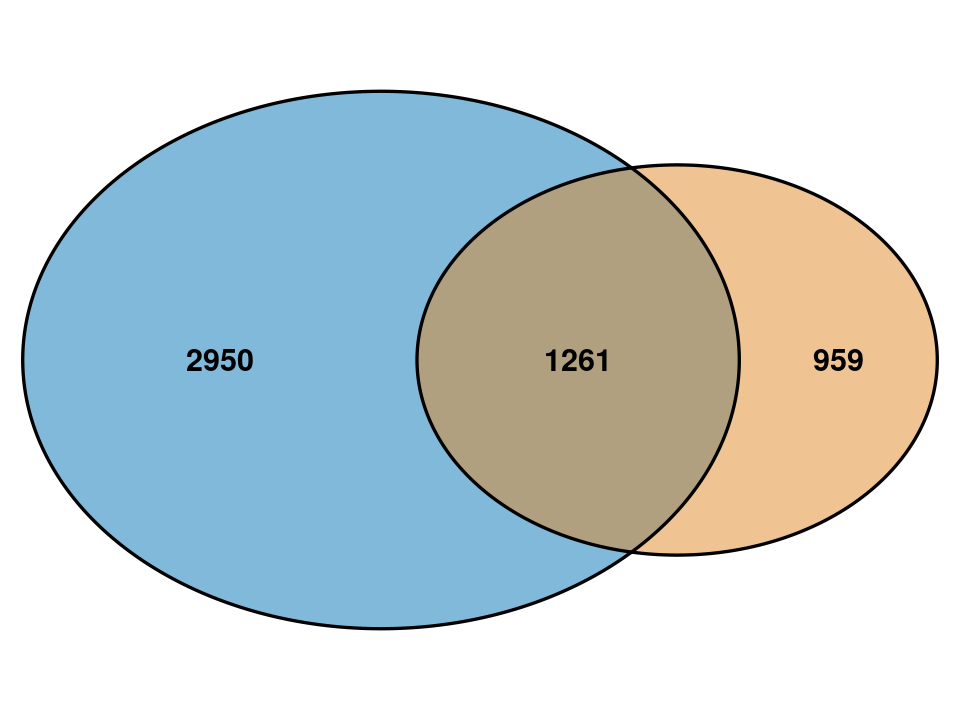

In [20]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(4211, 2220, 1261, 
                              fill = c("#0072B5FF", "#E18727FF"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../figures/tri_egene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

png 
  2

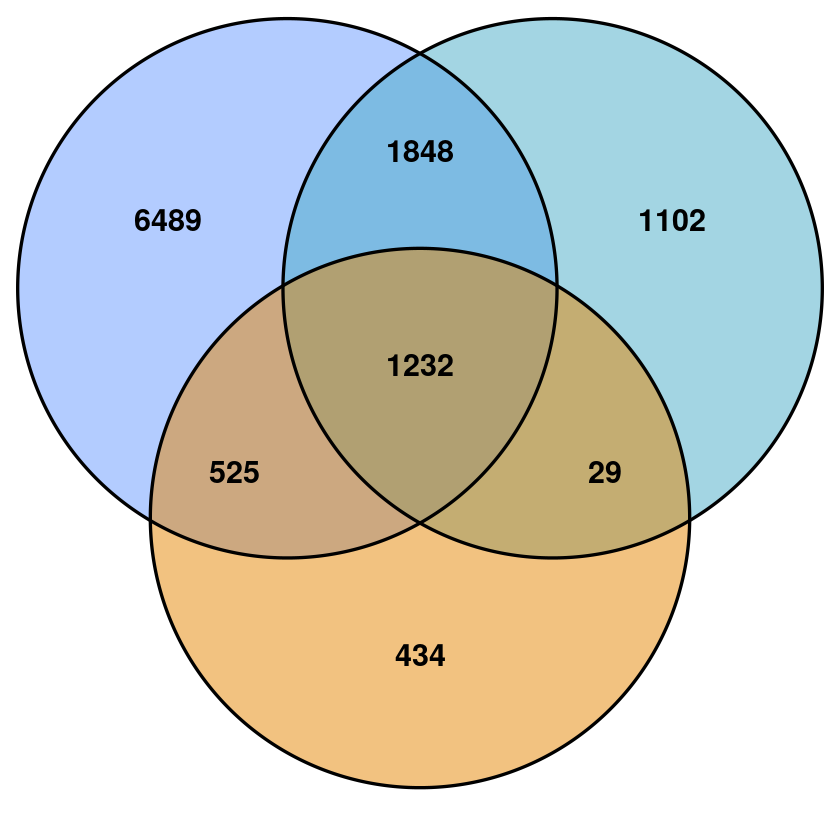

In [6]:
myCol <- c("#6699FF", "#46ACC8", "#E58601")
# area1, area2, area3, n12, n23, n13, n123
venn.plot <- draw.triple.venn(10094, 4211, 2220, 3080, 1261, 1757, 1232, 
                              fill = myCol,
                              alpha = c(.5,.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",7),
                              category = c("", "", ""), 
                              scaled = TRUE)
pdf("../figures/bulk_tri_egene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

**2-2: sQTL, intron overlap**

In [2]:
tri1 <- fread("../../sqtl_new/results/tri1_perm_15hcp/sig_pheno.txt", data.table = F)
tri2 <- fread("../../sqtl_new/results/tri2_perm_10hcp/sig_pheno.txt", data.table = F)

In [3]:
sum(unique(tri1$pid) %in% unique(tri2$pid))
length(unique(tri1$pid))
length(unique(tri2$pid))
dim(tri1)
dim(tri2)

[1] 3338

[1] 14193

[1] 5348

[1] 14193    13

[1] 5348   13

png 
  2

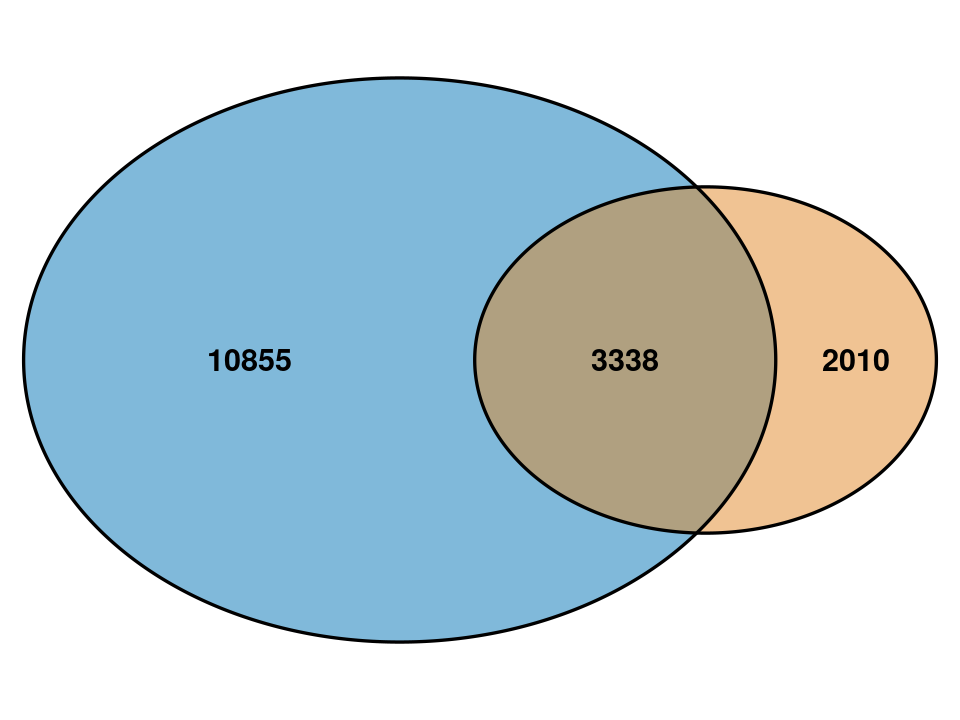

In [21]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(14193, 5348, 3338, 
                              fill = c("#0072B5FF", "#E18727FF"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../../sqtl_new/figures/tri_intron.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

**2-3: sQTL, sGene overlap**

In [4]:
load("../../sqtl_new/leafviz_annot/all.introns.tested.RData")

In [5]:
tri1 <- tri1 %>% left_join(pheno, by = c("pid" = "ID"))
tri2 <- tri2 %>% left_join(pheno, by = c("pid" = "ID"))
head(tri1)

,pid,nvar,shape1,shape2,dummy,sid,dist,npval,slope,ppval,bpval,qval,pval_nominal_threshold,verdict,gene,ensemblID,transcripts,constitutive.score
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,10:100137528:100143466:clu_20617_NA,3357,1.01909,523.446,108.613,rs7921146,49072,3.38406e-07,-0.622915,0.00039996,0.000400767,0.00816980,8.81907e-06,cryptic_unanchored,PYROXD2,ENSG00000119943.13_5,NA,0.33
2,10:100137528:100146958:clu_20617_NA,3357,1.04175,488.696,106.511,rs3750604,38052,3.67952e-07,-0.624487,0.00059994,0.000433388,0.00871203,1.07244e-05,cryptic_threeprime,PYROXD2,ENSG00000119943.13_5,.,0.00
3,10:100143573:100144704:clu_20617_NA,3333,1.04957,453.578,104.557,rs7923729,25891,8.12128e-07,-0.598002,0.00069993,0.001005450,0.01721800,1.20575e-05,cryptic_threeprime,PYROXD2,ENSG00000119943.13_5,.,0.00
4,10:100143625:100146958:clu_20617_NA,3332,1.03600,485.662,106.237,rs7921146,42975,1.57562e-07,-0.638626,0.00029997,0.000209189,0.00475732,1.04545e-05,novel annotated pair,PYROXD2,ENSG00000119943.13_5,ENST00000370575.5_3+ENST00000483923.5_2,0.67
5,10:100145024:100146958:clu_20617_NA,3334,1.03512,455.756,105.083,rs7921146,41576,1.44392e-06,-0.603343,0.00129987,0.001801960,0.02711200,1.10862e-05,cryptic_threeprime,PYROXD2,ENSG00000119943.13_5,.,0.00
6,10:100146466:100146958:clu_20617_NA,3332,1.06353,438.939,103.495,rs10883094,41639,2.33904e-06,-0.573179,0.00209979,0.002701160,0.03682140,1.34246e-05,cryptic_threeprime,PYROXD2,ENSG00000119943.13_5,.,0.00


In [26]:
length(unique(tri1$ensemblID))
length(unique(tri2$ensemblID))
length(unique(tri1$gene))
length(unique(tri2$gene))

[1] 5313

[1] 2319

[1] 5311

[1] 2319

In [23]:
sum(unique(tri1$ensemblID) == '.')
sum(unique(tri2$ensemblID) == '.')
sum(unique(tri1$gene) == '.')
sum(unique(tri2$ensemblID) == '.')

[1] 1

[1] 1

[1] 1

[1] 1

In [20]:
sum(pheno$gene == '.')

[1] 10043

In [27]:
sum(unique(tri1$ensemblID) %in% unique(tri2$ensemblID))

[1] 1763

png 
  2

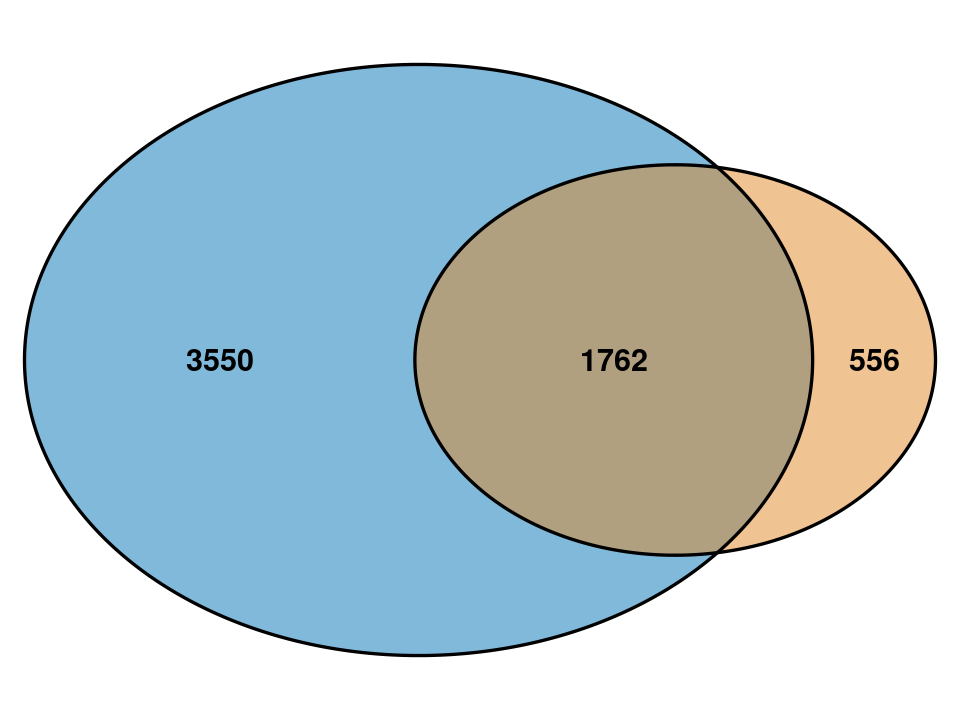

In [22]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(5312, 2318, 1762, 
                              fill = c("#0072B5FF", "#E18727FF"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../../sqtl_new/figures/tri_sgene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

### 3: h2
- Daniel ran GCTA
- SNP_h2 seems to be driven by trans_h2, which has funky bimodal distribution...N too small?
- 

**New results, cis, trans, residual**

In [11]:
adult <- fread("/u/project/gandalm/danieldu/gcta/data/EUR_SPC_gene_HRC_1Mbase_window/output/results/all_variance.txt", data.table = F)

In [12]:
tri1_h2 <- fread("/u/project/gandalm/danieldu/gcta/data/sliding_fetal/hg19_gene_regressed/results/1Mbase_window/1_to_137_1Mbase_window.csv", data.table = F)
tri2_h2 <- fread("/u/project/gandalm/danieldu/gcta/data/sliding_fetal/hg19_gene_regressed/results/1Mbase_window/138_to_280_1Mbase_window.csv", data.table = F)

In [13]:
shared <- Reduce(intersect, list(tri1_h2$gene, tri2_h2$gene, adult$ID))

In [5]:
length(shared)

[1] 21221

In [14]:
tri1_h2 <- tri1_h2 %>% filter(gene %in% shared)
tri2_h2 <- tri2_h2 %>% filter(gene %in% shared)
adult <- adult %>% filter(ID %in% shared)

In [15]:
dim(tri1_h2)
dim(tri2_h2)
dim(adult)

[1] 21221    12

[1] 21221    12

[1] 21221    17

In [15]:
tri1_h2$Group <- "First trimester"
tri2_h2$Group <- "Second trimester"
adult$Group <- "Adult"

In [17]:
colnames(adult)
colnames(tri1_h2)

[1] "ID"          "V_Cis"       "V_Trans"     "V_Res"       "V_Phe"      
 [6] "Cis_h2"      "Trans_h2"    "SNP_h2"      "SE_V_Cis"    "SE_V_Trans" 
[11] "SE_V_Res"    "SE_V_Phe"    "SE_Cis_h2"   "SE_Trans_h2" "SE_SNP_h2"  
[16] "P_val"       "Cis_SNPs"    "Group"

[1] "gene"      "cisvar"    "transvar"  "resvar"    "phenovar"  "cish2"    
 [7] "transh2"   "resh2"     "cish2se"   "transh2se" "resh2se"   "ncissnps" 
[13] "Group"

In [16]:
adult <- adult %>% select(ID, V_Cis, V_Trans, V_Res, V_Phe, Cis_h2, Trans_h2, SNP_h2, SE_Cis_h2, SE_Trans_h2, SE_SNP_h2, Cis_SNPs, Group)
colnames(adult) <- colnames(tri1_h2)

In [8]:
h2 <- rbind(tri1_h2, tri2_h2, adult)

In [9]:
h2$Group <- factor(h2$Group, levels = c("First trimester", "Second trimester", "Adult"))

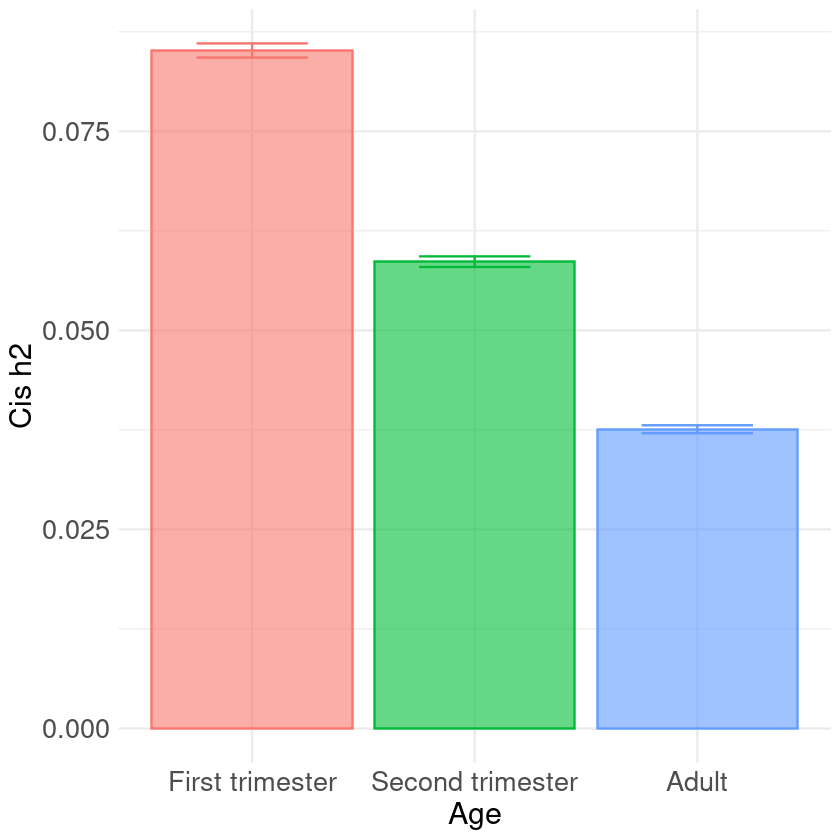

In [11]:
ggplot(h2, aes(y = cish2, x = Group, fill = Group, color = Group)) +
    stat_summary(fun.data = mean_se, position = position_dodge(0.95), geom = "errorbar", width = .5) + 
    stat_summary(fun = mean, position = position_dodge(width=0.95), geom = "bar", alpha = 0.6)+
    labs(y = "Cis h2", x = "Age") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") 

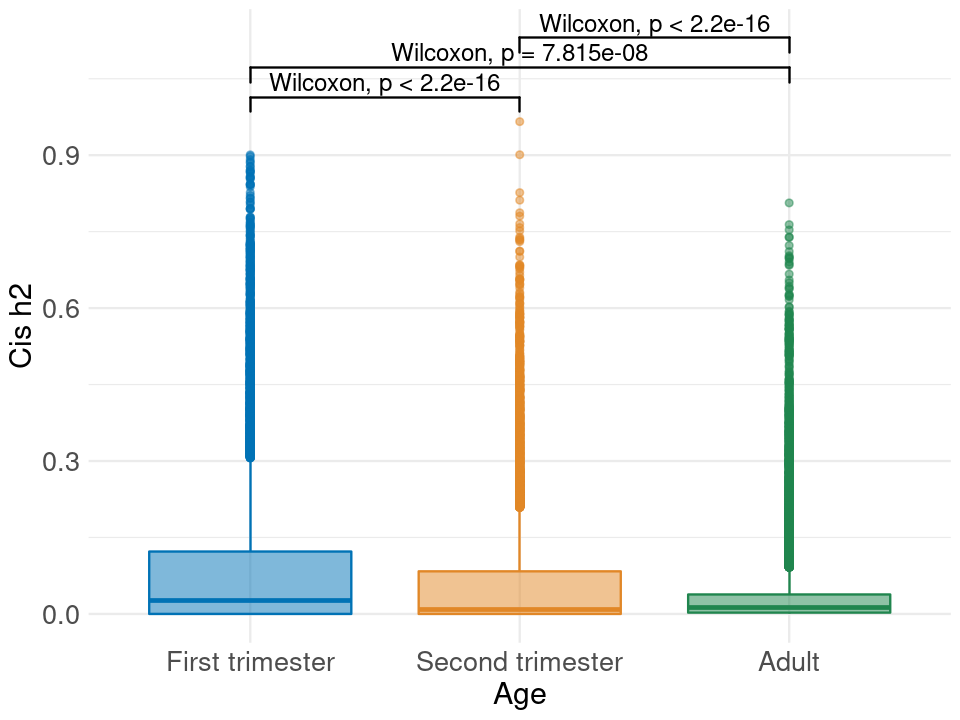

In [10]:
options(repr.plot.height = 6, repr.plot.width = 8)

ggplot(h2, aes(x = Group, y = cish2, fill = Group, color = Group)) +
#     geom_violin(alpha = 0.3, trim = TRUE, aes(color = Group)) +
    geom_boxplot(alpha = 0.5) +
    labs(x = "Age", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF", "#20854EFF")) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF", "#20854EFF")) +
#     stat_summary(fun = median, aes(color = Group), geom = "point", 
#                          shape = 21, size = 5, show.legend = FALSE, fill = "white", stroke = 1.5) +
#     ylim(0, 0.2)
    geom_signif(
        comparisons = list(c("First trimester", "Second trimester"),
                           c("First trimester", "Adult"),
                           c("Adult", "Second trimester")),
        annotation = c("Wilcoxon, p < 2.2e-16", "Wilcoxon, p = 7.815e-08", "Wilcoxon, p < 2.2e-16"),
#         map_signif_level = TRUE,
        textsize = 5,
        step_increase = 0.06,
        color = "black"
  )

In [43]:
ggsave("../figures/h2.pdf", width = 8, height = 6)

In [33]:
wilcox.test(tri1_h2$cish2, tri2_h2$cish2, alternative = "two.sided")
wilcox.test(adult$cish2, tri1_h2$cish2, alternative = "two.sided")
# wilcox.test(tri1_h2$cish2, adult$cish2)
wilcox.test(adult$cish2, tri2_h2$cish2, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  tri1_h2$cish2 and tri2_h2$cish2
W = 247847575, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  adult$cish2 and tri1_h2$cish2
W = 218387778, p-value = 7.815e-08
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  adult$cish2 and tri2_h2$cish2
W = 249145443, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


**Age batches, restricting to 31510 shared genes with converged results**

In [2]:
setwd("/u/project/gandalm/danieldu/gcta/data/sliding_fetal/hg19_gene_regressed/results/1Mbase_window/")

In [3]:
batch1 <- fread("1_to_150_1Mbase_window.csv", data.table = F)
batch2 <- fread("26_to_175_1Mbase_window.csv", data.table = F)
batch3 <- fread("51_to_200_1Mbase_window.csv", data.table = F)
batch4 <- fread("76_to_225_1Mbase_window.csv", data.table = F)
batch5 <- fread("101_to_250_1Mbase_window.csv", data.table = F)
batch6 <- fread("126_to_275_1Mbase_window.csv", data.table = F)
batch7 <- fread("151_to_280_1Mbase_window.csv", data.table = F)

In [24]:
lapply(list(batch1, batch2, batch3, batch4, batch5, batch6, batch7), dim)

[[1]]
[1] 31530    12

[[2]]
[1] 31528    12

[[3]]
[1] 31525    12

[[4]]
[1] 31525    12

[[5]]
[1] 31528    12

[[6]]
[1] 31527    12

[[7]]
[1] 31525    12

In [4]:
shared <- Reduce(intersect, list(batch1$gene, batch2$gene, batch3$gene,
                                 batch4$gene, batch5$gene, batch6$gene,
                                 batch7$gene))
length(shared)

[1] 31510

In [5]:
batch1 <- batch1 %>% filter(gene %in% shared)
batch2 <- batch2 %>% filter(gene %in% shared)
batch3 <- batch3 %>% filter(gene %in% shared)
batch4 <- batch4 %>% filter(gene %in% shared)
batch5 <- batch5 %>% filter(gene %in% shared)
batch6 <- batch6 %>% filter(gene %in% shared)
batch7 <- batch7 %>% filter(gene %in% shared)

In [27]:
lapply(list(batch1, batch2, batch3, batch4, batch5, batch6, batch7), dim)

[[1]]
[1] 31510    12

[[2]]
[1] 31510    12

[[3]]
[1] 31510    12

[[4]]
[1] 31510    12

[[5]]
[1] 31510    12

[[6]]
[1] 31510    12

[[7]]
[1] 31510    12

In [6]:
metadata <- read.table("/u/project/gandalm/cindywen/isoform_twas/eqtl_new/metadata_inferSex_trimester_ancestry_629.tsv", header = T)
metadata <- metadata %>% filter(ancestry == "eur") %>% arrange(Age)
metadata <- metadata %>% mutate(PCW = Age*365/7 + 40)

In [7]:
head(metadata)

,Subject,Age,Sex,inferSex,trimester,ancestry,PCW
,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
1,11903,-0.6904110,F,F,1,eur,4
2,11397,-0.6712329,F,F,1,eur,5
3,11931,-0.6520548,NA,F,1,eur,6
4,1038,-0.6328767,M,M,1,eur,7
5,11122,-0.6328767,F,F,1,eur,7
6,11627,-0.6328767,F,F,1,eur,7


In [8]:
df <- data.frame("mean_age" = NA,
                 "se_age" = NA)

In [10]:
for(i in c(1:7)) {
    start_id <- (i-1)*25+1
    end_id <- start_id + 149
    if(i == 7) {
        end_id <- 280
    }
    df[i,'mean_age'] <- mean(metadata[start_id:end_id,'PCW'])
    df[i,'se_age'] <- sd(metadata[start_id:end_id,'PCW'])/sqrt(150)
}

In [9]:
df$cis_h2 <- df$se <- NA

In [13]:
df[1,"cis_h2"] <- median(batch1$cish2)
df[2,"cis_h2"] <- median(batch2$cish2)
df[3,"cis_h2"] <- median(batch3$cish2)
df[4,"cis_h2"] <- median(batch4$cish2)
df[5,"cis_h2"] <- median(batch5$cish2)
df[6,"cis_h2"] <- median(batch6$cish2)
df[7,"cis_h2"] <- median(batch7$cish2)

df[1,"se"] <- sd(batch1$cish2)/sqrt(31510)
df[2,"se"] <- sd(batch2$cish2)/sqrt(31510)
df[3,"se"] <- sd(batch3$cish2)/sqrt(31510)
df[4,"se"] <- sd(batch4$cish2)/sqrt(31510)
df[5,"se"] <- sd(batch5$cish2)/sqrt(31510)
df[6,"se"] <- sd(batch6$cish2)/sqrt(31510)
df[7,"se"] <- sd(batch7$cish2)/sqrt(31510)

In [14]:
df

,mean_age,se_age,cis_h2,se
,<dbl>,<dbl>,<dbl>,<dbl>
1,10.44047,0.1974379,0.016942105,0.0006523407
2,11.66120,0.1901191,0.013635761,0.0006097745
3,12.94300,0.1695632,0.011605356,0.0005747747
4,14.15687,0.1491077,0.009923441,0.0005433753
5,15.18093,0.1491849,0.007000902,0.0005221565
6,16.29173,0.1649319,0.004616908,0.0005102139
7,17.30692,0.2642946,0.003849484,0.0005380614


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



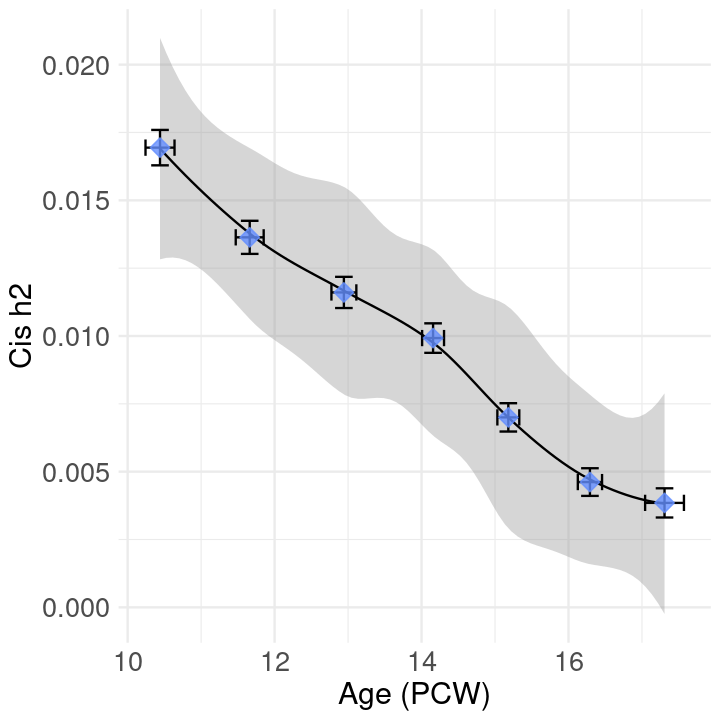

In [49]:
options(repr.plot.height = 6, repr.plot.width = 6)

ggplot(df, aes(x = mean_age, y = cis_h2)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0.0006) +
    geom_errorbar(aes(ymin = cis_h2 - se, ymax = cis_h2 + se), width = 0.24) +
    geom_point(size = 4, color = "#648FFF", fill = "#648FFF", shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18))

In [50]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/h2_batch.pdf", width = 6, height = 6)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



**Splicing**

In [22]:
tri1_h2 <- fread("/u/project/gandalm/danieldu/shared_results/fetal/h2/splicing/splicing_1Mbase_cis_trans_tri1.csv", data.table = F)
tri2_h2 <- fread("/u/project/gandalm/danieldu/shared_results/fetal/h2/splicing/splicing_1Mbase_cis_trans_tri2.csv", data.table = F)

In [23]:
head(tri1_h2)

,junction,cisvar,transvar,resvar,phenovar,cish2,transh2,hg2,cish2se,transh2se,hg2se,ncissnps
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1:14829:14930:clu_7637_NA,4.403206e-05,0.1532289573,0.16699989,0.3207119,1.374830e-04,0.478432512,0.478569995,0.04504813,1.0653849,1.0656361,438
2,1:14829:14970:clu_7637_NA,5.215503e-06,0.2410727835,0.31764060,0.5592090,9.334758e-06,0.431474422,0.431483757,0.04496734,1.0452594,1.0455012,438
3,1:14829:15021:clu_7637_NA,1.292423e-09,0.0003383735,0.12179130,0.1221247,1.058238e-08,0.002770608,0.002770619,0.04479754,0.8264723,0.8266789,438
4,1:14829:15796:clu_7637_NA,1.173523e-05,0.0847567354,0.03593446,0.1215209,9.722405e-05,0.702192883,0.702290107,0.04499365,1.1529233,1.1532192,438
5,1:15038:15796:clu_7637_NA,7.935577e-20,0.1356211949,0.41223039,0.5481392,1.448490e-19,0.247550975,0.247550975,0.04492888,0.9598877,0.9601017,438
6,1:15942:16607:clu_7638_NA,4.392863e-05,0.3974542551,0.37050814,0.7719541,5.719827e-05,0.517514303,0.517571502,0.04503720,1.0816103,1.0818709,439


In [24]:
shared <- Reduce(intersect, list(tri1_h2$junction, tri2_h2$junction))
length(shared)

[1] 267400

In [25]:
tri1_h2 <- tri1_h2 %>% filter(junction %in% shared)
tri2_h2 <- tri2_h2 %>% filter(junction %in% shared)
tri1_h2$Group <- "First trimester"
tri2_h2$Group <- "Second trimester"

In [26]:
h2 <- rbind(tri1_h2, tri2_h2)

In [27]:
h2$Group <- factor(h2$Group, levels = c("First trimester", "Second trimester"))

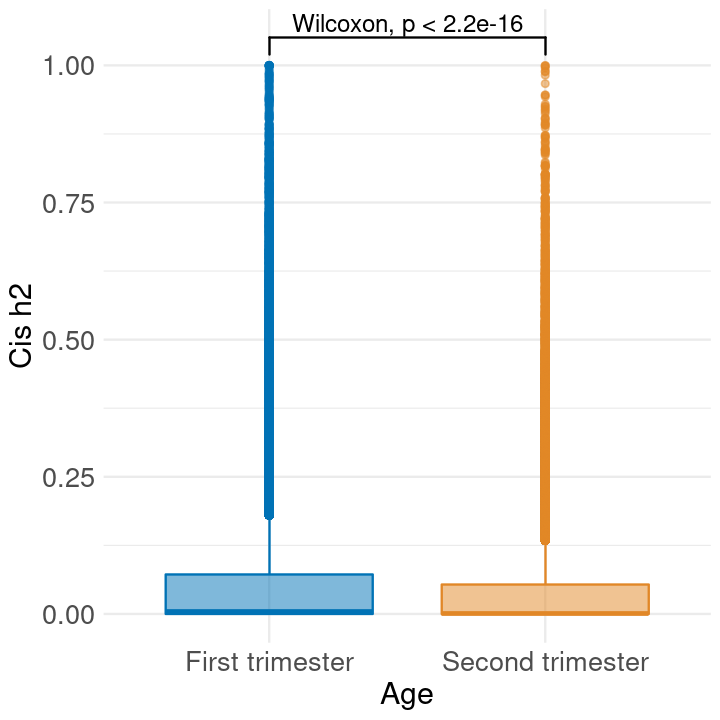

In [40]:
ggplot(h2, aes(x = Group, y = cish2, fill = Group, color = Group)) +
#     geom_violin(alpha = 0.3, trim = TRUE, aes(color = Group)) +
    geom_boxplot(alpha = 0.5) +
    labs(x = "Age", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF")) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF")) +
#     stat_summary(fun = median, aes(color = Group), geom = "point", 
#                          shape = 21, size = 5, show.legend = FALSE, fill = "white", stroke = 1.5) +
#     ylim(0, 2) +
    geom_signif(
        comparisons = list(c("First trimester", "Second trimester")),
        annotation = c("Wilcoxon, p < 2.2e-16"),
#         map_signif_level = TRUE,
        textsize = 5,
        step_increase = 0.06,
        color = "black"
  )

In [41]:
ggsave("../../sqtl_new/figures/h2.pdf", width = 6, height = 6)

In [29]:
wilcox.test(tri1_h2$cish2, tri2_h2$cish2, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  tri1_h2$cish2 and tri2_h2$cish2
W = 3.8214e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [31]:
wilcox.test(tri1_h2$cish2, tri2_h2$cish2)


	Wilcoxon rank sum test with continuity correction

data:  tri1_h2$cish2 and tri2_h2$cish2
W = 3.8214e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [2]:
setwd("/u/project/gandalm/danieldu/shared_results/fetal/h2/splicing")

In [4]:
batch1 <- fread("1_to_150_1Mbase_cis_trans.csv", data.table = F)
batch2 <- fread("26_to_175_1Mbase_cis_trans.csv", data.table = F)
batch3 <- fread("51_to_200_1Mbase_cis_trans.csv", data.table = F)
batch4 <- fread("76_to_225_1Mbase_cis_trans.csv", data.table = F)
batch5 <- fread("101_to_250_1Mbase_cis_trans.csv", data.table = F)
batch6 <- fread("126_to_275_1Mbase_cis_trans.csv", data.table = F)
batch7 <- fread("151_to_288_1Mbase_cis_trans.csv", data.table = F)

In [5]:
head(batch1)

,junction,cisvar,transvar,resvar,phenovar,cish2,transh2,hg2,cish2se,transh2se,hg2se,ncissnps
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1:14829:14930:clu_7637_NA,1.713966e-05,0.161689533,0.1604745,0.3233662,5.319881e-05,0.50185899,0.50191219,0.04304629,0.9922988,0.9914762,438
2,1:14829:14970:clu_7637_NA,4.088986e-03,0.471365019,0.1085882,0.5921908,7.001182e-03,0.80707350,0.81407468,0.04713196,1.1066582,1.1058410,438
3,1:14829:15021:clu_7637_NA,2.296158e-23,0.001513836,0.1254756,0.1269869,1.808148e-22,0.01192096,0.01192096,0.04277983,0.7535647,0.7523626,438
4,1:14829:15796:clu_7637_NA,2.062643e-58,0.014393291,0.1496813,0.1641336,1.257138e-57,0.08772409,0.08772409,0.04284990,0.7967202,0.7955744,438
5,1:15038:15796:clu_7637_NA,3.686388e-22,0.126262724,0.4165552,0.5432368,6.791205e-22,0.23260602,0.23260602,0.04294373,0.8721504,0.8711188,438
6,1:15942:16607:clu_7638_NA,3.015527e-07,0.359920962,0.4132314,0.7742698,3.900299e-07,0.46552377,0.46552416,0.04305192,0.9773775,0.9765301,439


In [7]:
shared <- Reduce(intersect, list(batch1$junction, batch2$junction, batch3$junction,
                                 batch4$junction, batch5$junction, batch6$junction,
                                 batch7$junction))
length(shared)

[1] 270008

In [8]:
batch1 <- batch1 %>% filter(junction %in% shared)
batch2 <- batch2 %>% filter(junction %in% shared)
batch3 <- batch3 %>% filter(junction %in% shared)
batch4 <- batch4 %>% filter(junction %in% shared)
batch5 <- batch5 %>% filter(junction %in% shared)
batch6 <- batch6 %>% filter(junction %in% shared)
batch7 <- batch7 %>% filter(junction %in% shared)

In [9]:
metadata <- read.table("/u/project/gandalm/cindywen/isoform_twas/eqtl_new/metadata_inferSex_trimester_ancestry_640.tsv", header = T)
metadata <- metadata %>% filter(ancestry == "eur") %>% arrange(Age)
metadata <- metadata %>% mutate(PCW = Age*365/7 + 40)

In [10]:
df <- data.frame("mean_age" = NA,
                 "se_age" = NA)

In [11]:
for(i in c(1:7)) {
    start_id <- (i-1)*25+1
    end_id <- start_id + 149
    if(i == 7) {
        end_id <- 288
    }
    df[i,'mean_age'] <- mean(metadata[start_id:end_id,'PCW'])
    df[i,'se_age'] <- sd(metadata[start_id:end_id,'PCW'])/sqrt(150)
}

In [12]:
df$cis_h2 <- df$se <- NA

df[1,"cis_h2"] <- median(batch1$cish2)
df[2,"cis_h2"] <- median(batch2$cish2)
df[3,"cis_h2"] <- median(batch3$cish2)
df[4,"cis_h2"] <- median(batch4$cish2)
df[5,"cis_h2"] <- median(batch5$cish2)
df[6,"cis_h2"] <- median(batch6$cish2)
df[7,"cis_h2"] <- median(batch7$cish2)

df[1,"se"] <- sd(batch1$cish2)/sqrt(270008)
df[2,"se"] <- sd(batch2$cish2)/sqrt(270008)
df[3,"se"] <- sd(batch3$cish2)/sqrt(270008)
df[4,"se"] <- sd(batch4$cish2)/sqrt(270008)
df[5,"se"] <- sd(batch5$cish2)/sqrt(270008)
df[6,"se"] <- sd(batch6$cish2)/sqrt(270008)
df[7,"se"] <- sd(batch7$cish2)/sqrt(270008)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



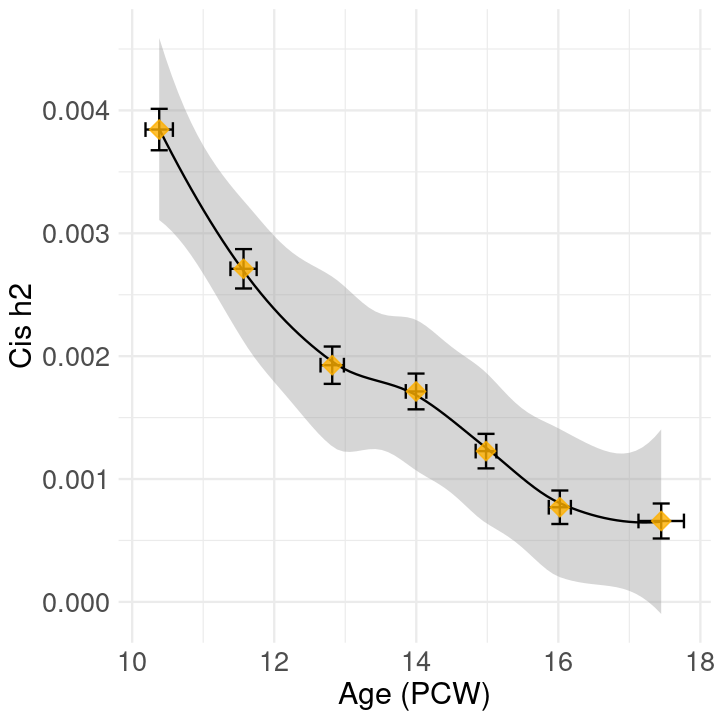

In [15]:
options(repr.plot.height = 6, repr.plot.width = 6)

ggplot(df, aes(x = mean_age, y = cis_h2)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0.00012) +
    geom_errorbar(aes(ymin = cis_h2 - se, ymax = cis_h2 + se), width = 0.24) +
    geom_point(size = 4, color = "#FFB000", fill = "#FFB000", shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18))

ggsave("~/project-gandalm/isoform_twas/sqtl_new/figures/h2_batch.pdf", width = 6, height = 6)

**pLI LOF tolerence vs h2**
- pLI drops as h2 goes up (more tolerant)? Or
- pLI higher in the earlier time points?

In [20]:
exac <- fread("/u/project/gandalm/shared/refGenomes/gnomAD_ExAC/forweb_cleaned_exac_r03_march16_z_data_pLI_CNV-final.txt.gz", 
              data.table = F)
exac <- exac %>% select(gene, pLI)
exac <- exac[!duplicated(exac$gene),]

In [21]:
gencode <- fread("~/project-gandalm/isoform_twas/salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)
gencode <- gencode %>% filter(V11 == "protein_coding", !V1 %in% c("chrM", "chrX", "chrY")) %>% select(ensg, V11, V12)

dup <- gencode[duplicated(gencode$V12),]
gencode <- gencode %>% filter(!V12 %in% dup$V12) # 19105 genes, protein-coding, autosomal, unique ENSG-name
exac <- exac %>% inner_join(gencode, by = c("gene" = "V12")) %>% select(gene, ensg, pLI)

In [45]:
df1 <- batch1 %>% inner_join(exac, by = c("gene" = "ensg"))
dim(df1)

[1] 14197    14

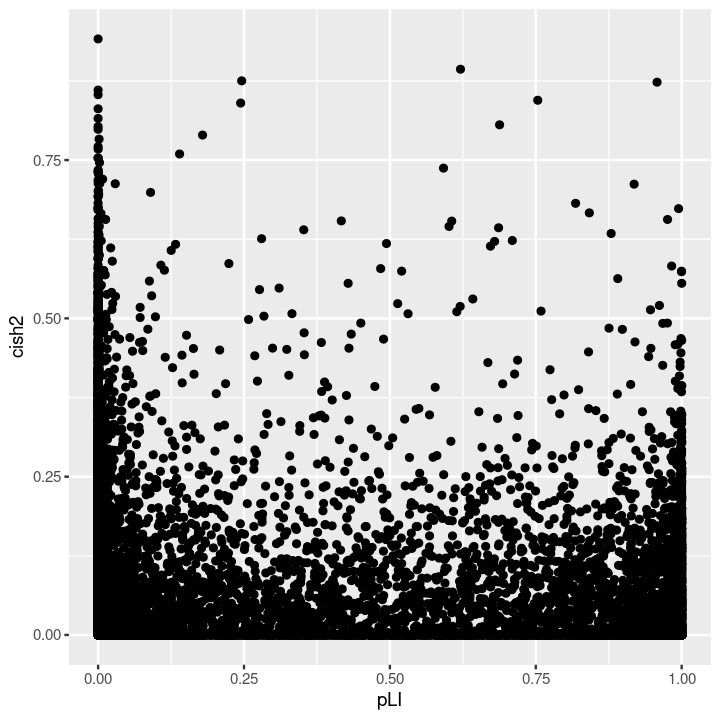

In [46]:
ggplot(df1, aes(x = pLI, y = cish2)) +
    geom_point()

In [47]:
df1 <- batch1 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch1")
df2 <- batch2 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch2")
df3 <- batch3 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch3")
df4 <- batch4 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch4")
df5 <- batch5 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch5")
df6 <- batch6 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch6")
df7 <- batch7 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch7")
df_all <- rbind(df1, df2, df3, df4, df5, df6, df7)

In [48]:
dim(df_all)
14197*7

[1] 99379    15

[1] 99379

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



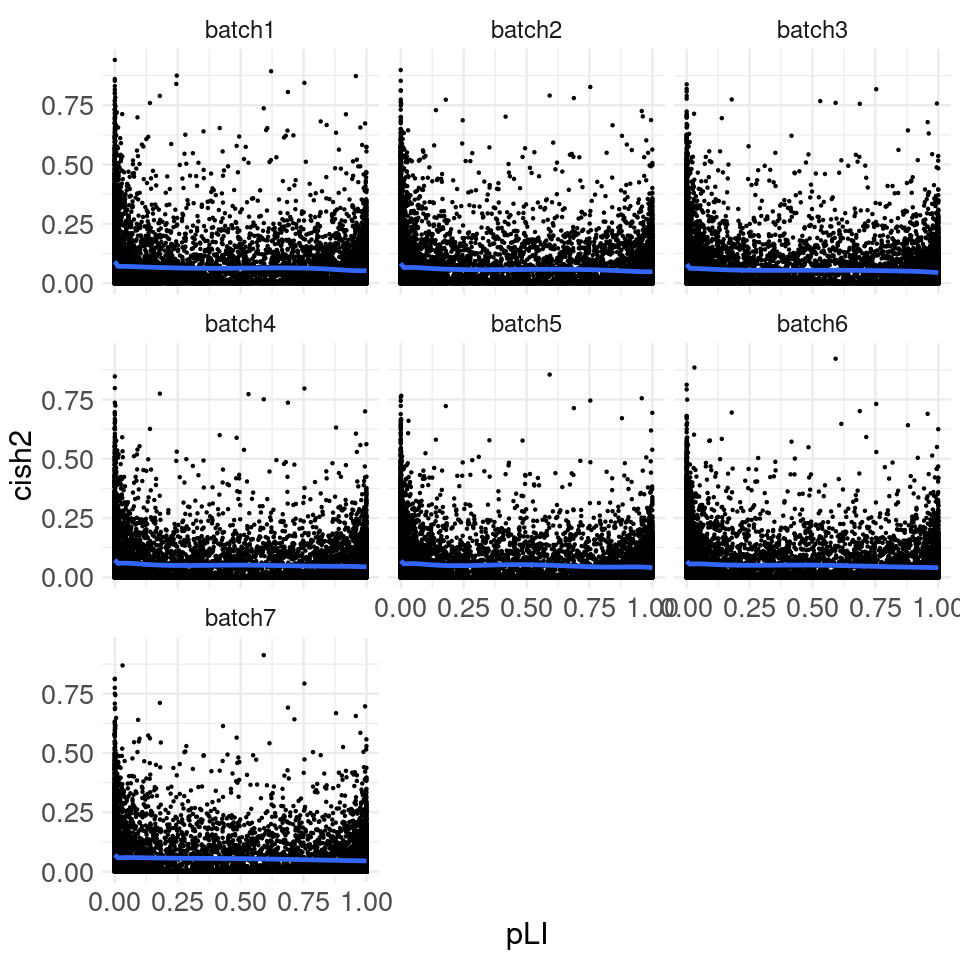

In [54]:
options(repr.plot.height = 8, repr.plot.width = 8)

ggplot(df_all, aes(x = pLI, y = cish2)) +
    geom_point(size = 0.2) +
    facet_wrap(~batch, scales = "fixed") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          strip.text.x = element_text(size = 14)) +
    geom_smooth()

[1] 13405    15

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



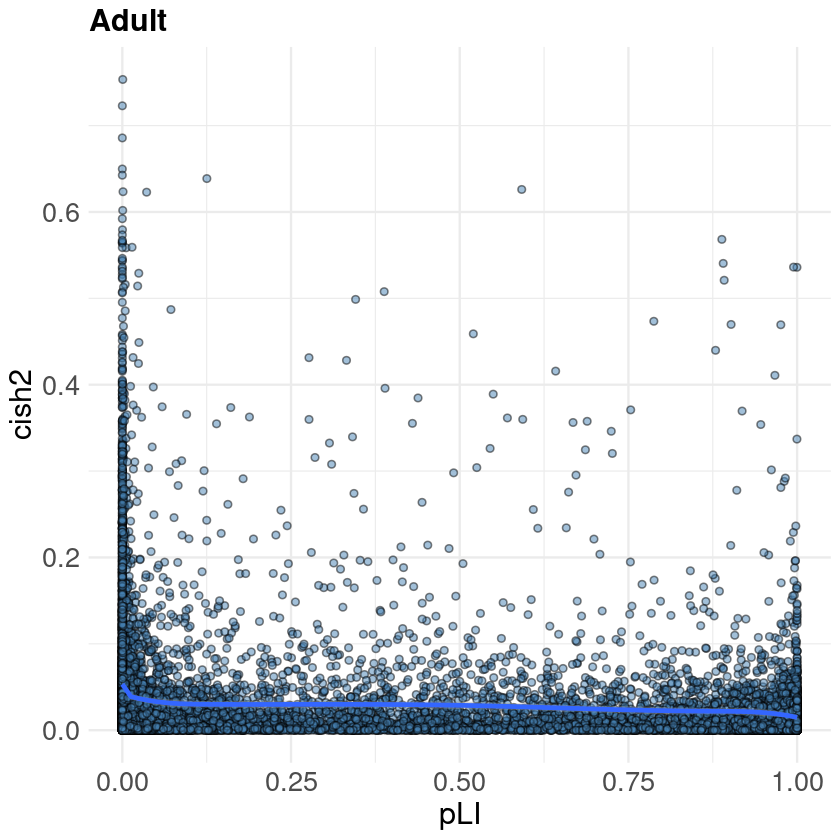

In [27]:
adult_exac <- adult %>% inner_join(exac, by = c("gene" = "ensg"))
dim(adult_exac)
ggplot(adult_exac, aes(x = pLI, y = cish2)) +
    geom_point(shape = 21, fill = "steelblue", alpha = 0.5) +
#     facet_wrap(~batch, scales = "fixed") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold")) +
    labs(title = "Adult") +
    geom_smooth()

In [28]:
head(tri1)

ERROR: Error in head(tri1): object 'tri1' not found


[1] 13405    15

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



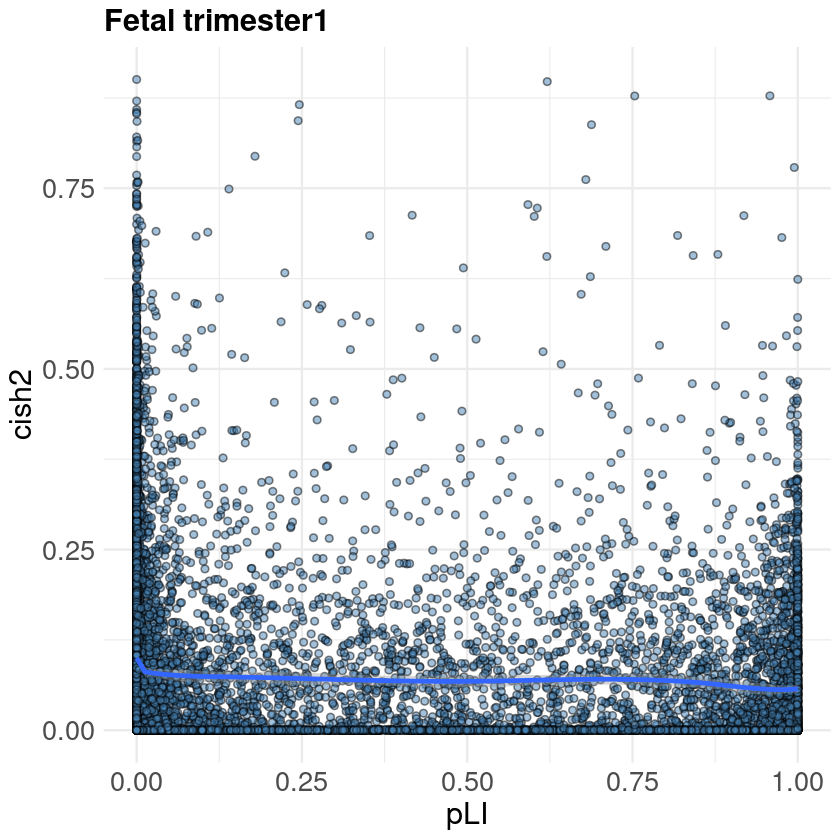

In [31]:
tri1_exac <- tri1_h2 %>% inner_join(exac, by = c("gene" = "ensg"))
dim(tri1_exac)
ggplot(tri1_exac, aes(x = pLI, y = cish2)) +
    geom_point(shape = 21, fill = "steelblue", alpha = 0.5) +
#     facet_wrap(~batch, scales = "fixed") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold")) +
    labs(title = "Fetal trimester1") +
    geom_smooth()

[1] 13405    15

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



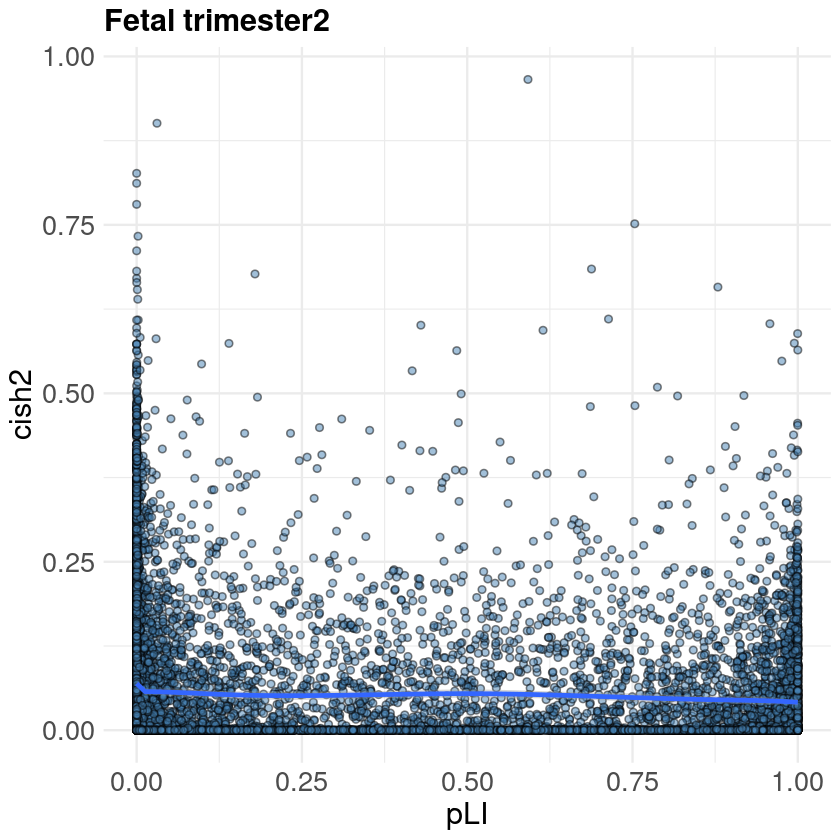

In [32]:
tri2_exac <- tri2_h2 %>% inner_join(exac, by = c("gene" = "ensg"))
dim(tri2_exac)
ggplot(tri2_exac, aes(x = pLI, y = cish2)) +
    geom_point(shape = 21, fill = "steelblue", alpha = 0.5) +
#     facet_wrap(~batch, scales = "fixed") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold")) +
    labs(title = "Fetal trimester2") +
    geom_smooth()

### 4: trimester specific eGene
- Looking for genes with the most different qvals in permutation output files
- Some of the top ones have small minor allele count in the trimester separate VCFs. The whole EUR file passed MAF>0.01, but some variants in the separate trimester files have small MAF. 

In [2]:
# dose <- fread("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/eur/filtered.hg19.sorted.removeGeneOutlier.dose.tsv.gz", data.table = F)

In [3]:
expr <- fread("../../TWAS/data/eur_gene_exp_regressed.txt", data.table = F)

In [4]:
meta <- read.table("../metadata_654.tsv", header = T)
# head(meta)
meta <- meta %>% filter(Subject %in% colnames(expr))

In [5]:
expr.gene <- expr %>% filter(TargetID == "ENSG00000116874") %>% select(meta$Subject)
df <- t(expr.gene) %>% as.data.frame()

In [6]:
df$trimester <- meta$trimester
table(df$trimester)


  1   2   3 
137 141   2 

In [7]:
# dose.sid <- dose %>% filter(CHROM == 1, POS == 119600175)
dose.sid <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/eur/rs146862216_dose.tsv", check.names = F, header = T)

dose.sid <- dose.sid %>% select(meta$Subject)
dose.sid <- as.data.frame(t(dose.sid))
df$Genotype <- dose.sid[,1]

In [8]:
df$trimester <- as.factor(df$trimester)
df$Genotype <- as.factor(df$Genotype)
df <- df %>% filter(trimester %in% c(1, 2))
dim(df)

[1] 278   3

In [9]:
table(df$Genotype, df$trimester)

   
     1  2  3
  0 82 78  0
  1 51 57  0
  2  4  6  0

In [10]:
colnames(df) <- c("WARS2", "Trimester", "rs146862216")

In [11]:
levels(df$rs146862216) <- c(levels(df$rs146862216), "G/G", "A/G", "A/A")
df$rs146862216[df$rs146862216 == 0] <- 'G/G'
df$rs146862216[df$rs146862216 == 1] <- 'A/G'
df$rs146862216[df$rs146862216 == 2] <- 'A/A'

`geom_smooth()` using formula 'y ~ x'



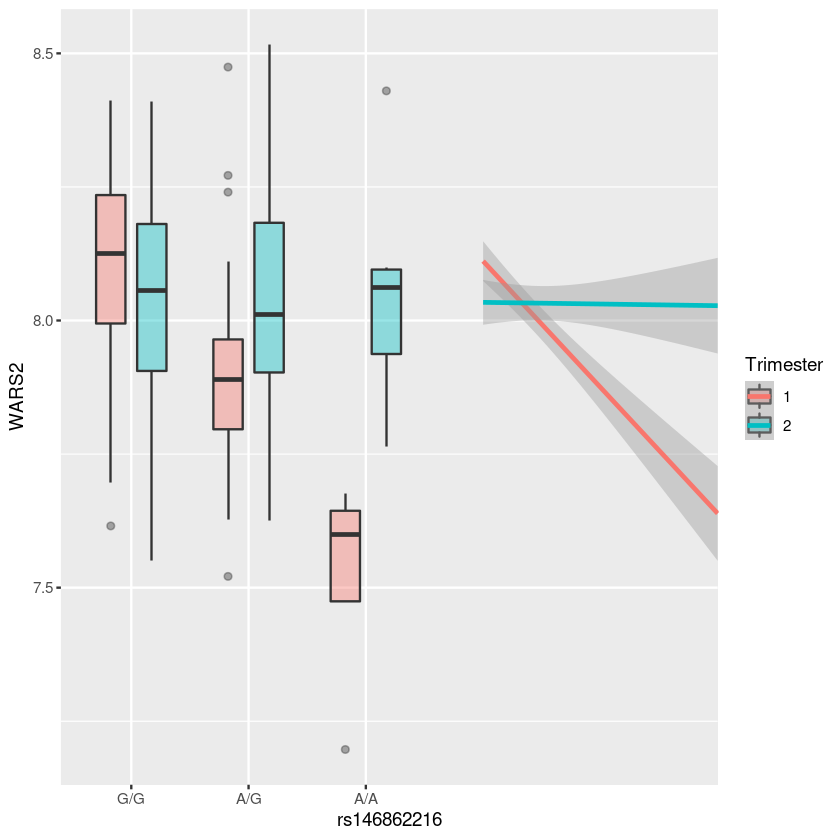

In [58]:
ggplot(df) +
    geom_boxplot(aes(x = rs146862216, y = WARS2, fill = Trimester), alpha = 0.4, width = 0.5, position = position_dodge(width = 0.7)) + 
    geom_smooth(aes(as.numeric(rs146862216), WARS2, color = Trimester), method = "lm") 

#     geom_point(aes(color = Trimester), 
#                position = position_jitterdodge(),
#                alpha = 0.5) +
#     labs(y = "WARS2 expression level") + 
#     theme_minimal() +
#     theme(axis.text = element_text(size = 16),
#           axis.title = element_text(size = 18),
#           legend.title = element_text(size = 16),
#           legend.text = element_text(size = 14)) +
#     scale_fill_manual(values = c("#0072B5FF", "#E18727FF")) +
#     scale_color_manual(values = c("#0072B5FF", "#E18727FF"))


In [46]:
ggsave("../figures/WARS2.pdf", height = 6, width = 6)

ERROR: Error: Discrete value supplied to continuous scale


### 5: aFC

In [2]:
tri1 <- read.table("../results/eur_trimester/aFC/tri1.txt", header = T)
# tri1 <- tri1 %>% filter(pid != "pid")
# dim(tri1)
# write.table(tri1, "../results/eur_trimester/aFC/tri1.txt", col.names=T,row.names=F,quote=F, sep="\t")

[1] 4211   18

In [3]:
tri2 <- read.table("../results/eur_trimester/aFC/tri2.txt", header = T)
# tri2 <- tri2 %>% filter(pid != "pid")
# dim(tri2)
# write.table(tri2, "../results/eur_trimester/aFC/tri2.txt", col.names=T,row.names=F,quote=F, sep="\t")

[1] 2220   18

In [4]:
head(tri1)

,pid,nvar,shape1,shape2,dummy,sid,dist,npval,slope,ppval,bpval,qval,pval_nominal_threshold,sid_chr,sid_pos,log2_aFC,log2_aFC_lower,log2_aFC_upper
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ENSG00000042286,6376,1.05995,1099.91,92.3982,rs756296225,9202,1.25065e-10,-0.432499,9.999e-05,5.30445e-07,8.44899e-06,1.67176e-05,10,71901892,-0.4285535442887474,-0.5436312597608922,-0.3440331320436731
2,ENSG00000043591,4312,1.05708,651.9,93.0219,rs7903424,-899589,4.72317e-06,-0.380518,0.00519948,0.00663352,0.0291654,2.78634e-05,10,114904036,-0.859502688790098,-1.1840647285406813,-0.4975098342634016
3,ENSG00000055950,3739,1.05881,452.29,89.9439,rs11190773,-24844,5.04684e-09,0.411953,9.999e-05,1.11068e-05,0.000131606,4.04564e-05,10,102722428,0.29776448185943755,0.2532337249031359,0.3528558291829892
4,ENSG00000057608,5135,1.04342,1049.17,95.1342,rs3736461,-28692,4.59496e-08,-0.287022,0.00029997,0.000105659,0.000968258,1.63216e-05,10,5855403,-0.20234271457612532,-0.24646626651742992,-0.14940788988828266
5,ENSG00000065621,3983,1.03284,423.465,90.9196,rs612406,-22896,1.25967e-17,-0.756081,9.999e-05,1.62172e-13,8.34877e-12,3.85931e-05,10,106005735,-1.1328033088695175,-1.3655302783800076,-0.9643939538503031
6,ENSG00000075073,5649,1.04563,888.437,92.9716,rs1000252,-14386,1.06145e-06,0.276389,0.00229977,0.00238625,0.013204,1.9461e-05,10,71162288,0.463092159715696,0.33760705159981996,0.5811531672976191


In [5]:
tri1 <- tri1 %>% unite(pair, pid, sid, sep=":")
tri2 <- tri2 %>% unite(pair, pid, sid, sep=":")

In [6]:
df <- tri1 %>% inner_join(tri2, by = "pair")
dim(df)

[1] 222  33

In [17]:
cols.num <- c("log2_aFC.x", "log2_aFC_lower.x", "log2_aFC_upper.x",
              "log2_aFC.y", "log2_aFC_lower.y", "log2_aFC_upper.y")
df[cols.num] <- sapply(df[cols.num],as.numeric)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing missing values (geom_segment).”


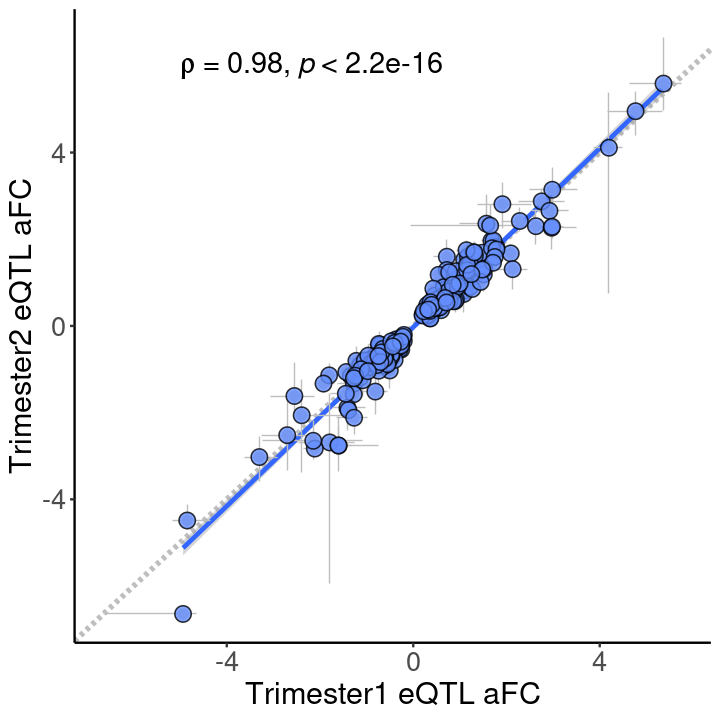

In [20]:
options(repr.plot.height = 6, repr.plot.width = 6)

ggplot(df, aes(x = log2_aFC.x, y = log2_aFC.y)) +
    geom_abline(intercept = 0, slope = 1, color = "grey", linetype = "dashed", size = 1.2) +
    geom_smooth(method = "lm") +
    geom_pointrange(aes(xmin = log2_aFC_lower.x, xmax = log2_aFC_upper.x), 
                  colour = "grey", size = .3) +
    geom_pointrange(aes(ymin = log2_aFC_lower.y, ymax = log2_aFC_upper.y), 
                  colour = "grey", size = .3) +
    geom_point(size = 4, fill = "#648FFF", shape = 21, alpha = 0.8) +
    labs(x = "Trimester1 eQTL aFC", y = "Trimester2 eQTL aFC") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18)) +
    stat_cor(method = "spearman", label.x = -5, label.y = 6, cor.coef.name = "rho", size = 6)

In [21]:
ggsave("../figures/tri_aFC.pdf", height = 6, width = 6)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing missing values (geom_segment).”


### Old results

In [20]:
tri1_h2 <- fread("/u/project/gandalm/danieldu/gcta/data/Trimester_1_EUR_25_HPC_gene_filtered_1Mbase_window/output/results/all_variance.txt", data.table = F)
tri2_h2 <- fread("/u/project/gandalm/danieldu/gcta/data/Trimester_2_EUR_15_HPC_gene_filtered_1Mbase_window/output/results/all_variance.txt", data.table = F)
adult <- fread("/u/project/gandalm/danieldu/gcta/data/EUR_SPC_gene_HRC_1Mbase_window/output/results/all_variance.txt", data.table = F)

In [21]:
shared <- Reduce(intersect, list(tri1_h2$ID, tri2_h2$ID, adult$ID))

In [22]:
tri1_h2 <- tri1_h2 %>% filter(ID %in% shared)
tri2_h2 <- tri2_h2 %>% filter(ID %in% shared)
adult <- adult %>% filter(ID %in% shared)

In [23]:
dim(tri1_h2)
dim(tri2_h2)
dim(adult)

[1] 21224    17

[1] 21224    17

[1] 21224    17

In [24]:
tri1_h2$Group <- "Tri1"
tri2_h2$Group <- "Tri2"
adult$Group <- "Adult"

In [50]:
h2 <- rbind(tri1_h2, tri2_h2, adult)

Warning message:
“Ignoring unknown parameters: outlier.shape”
Warning message:
“Removed 7472 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 7472 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 7472 rows containing non-finite values (stat_summary).”


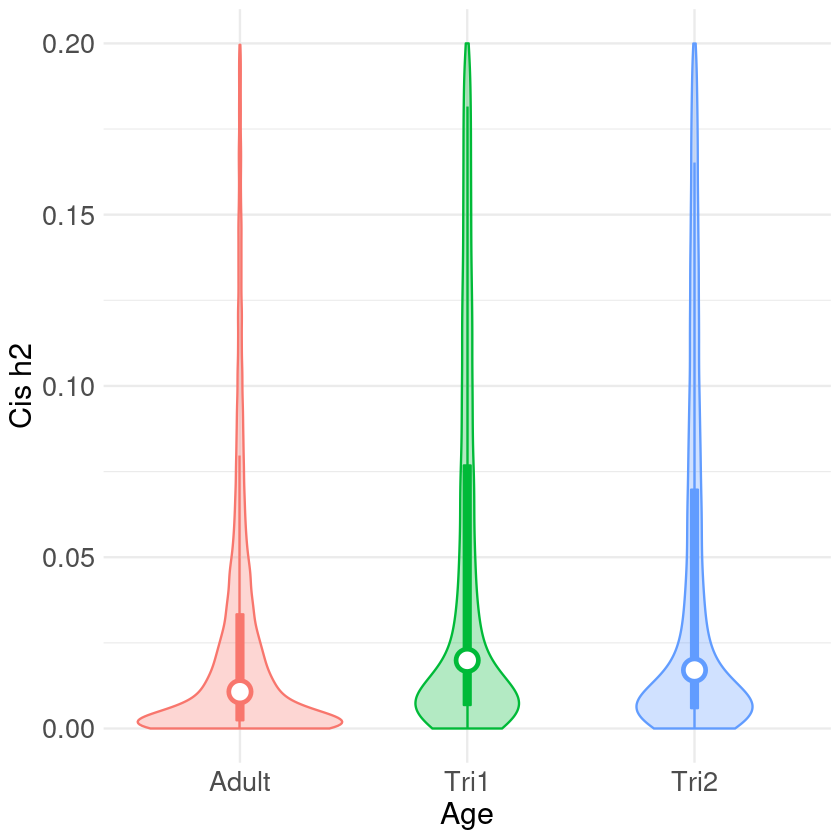

In [38]:
ggplot(h2, aes(x = Group, y = Cis_h2, fill = Group)) +
    geom_violin(alpha = 0.3, trim = TRUE, aes(color = Group), outlier.shape=NA) +
    geom_boxplot(width = 0.03, aes(color = Group), outlier.shape=NA) +
    labs(x = "Age", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
#     scale_fill_manual(values = c("#46ACC8", "#E58601")) +
#     scale_color_manual(values = c("#46ACC8", "#E58601")) +
    stat_summary(fun = median, aes(color = Group), geom = "point", 
                         shape = 21, size = 5, show.legend = FALSE, fill = "white", stroke = 1.5) +
    ylim(0, 0.2)
#     geom_signif(
#         comparisons = list(c("Trimester 1", "Trimester 2")),
#         annotation = "Wilcoxon, p < 2.2e-16",
#         textsize = 5
#   )

In [39]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/tri_adult.pdf", height = 5, width = 5)

Warning message:
“Removed 7472 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 7472 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 7472 rows containing non-finite values (stat_summary).”


In [51]:
h2$Group <- factor(h2$Group, levels = c("Adult", "Tri2", "Tri1"))

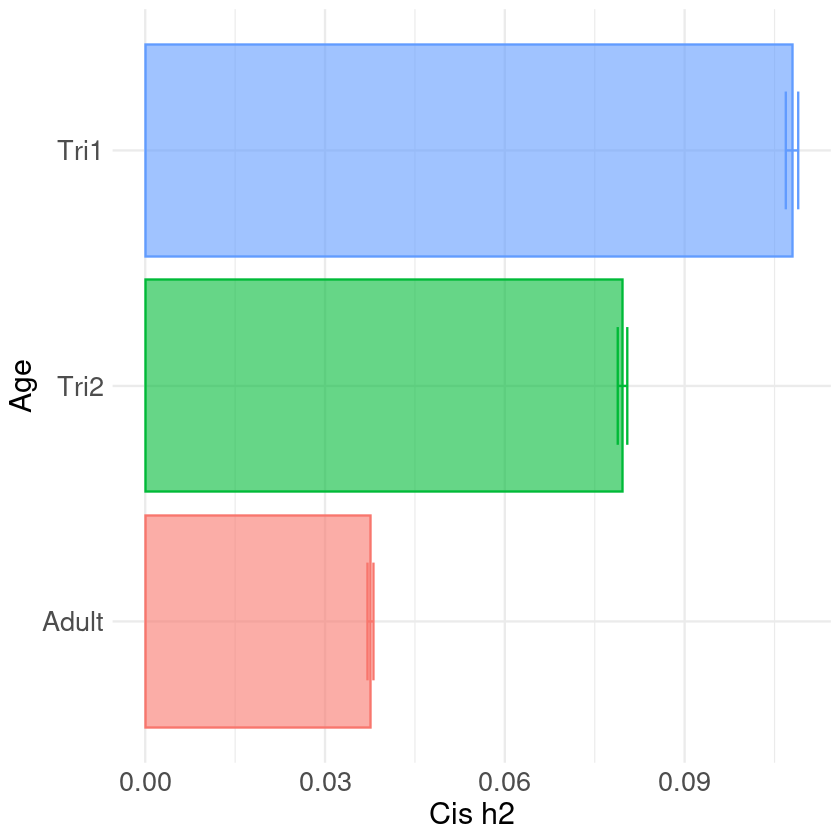

In [60]:
ggplot(h2, aes(x = Cis_h2, y = Group, fill = Group, color = Group)) +
    stat_summary(fun.data = mean_se, position=position_dodge(0.95), geom="errorbar", width = .5, aes(color=Group)) + 
  stat_summary(fun = mean, position = position_dodge(width=0.95), geom = "bar", alpha = 0.6)+
    labs(x = "Cis h2", y = "Age") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") 

In [62]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/tri_adult_h2.pdf", height = 3, width = 3)

In [14]:
sum(tri1_h2$P_val < 0.05)
sum(tri2_h2$P_val < 0.05)
sum(adult$P_val < 0.05)

[1] 3166

[1] 2084

[1] 6750

In [15]:
tri1_sig <- tri1_h2 %>% filter(P_val < 0.05)
tri2_sig <- tri2_h2 %>% filter(P_val < 0.05)
adult_sig <- adult %>% filter(P_val < 0.05)

In [17]:
sum(tri1_sig$ID %in% tri2_sig$ID) #12
sum(tri1_sig$ID %in% adult_sig$ID) #13
sum(tri2_sig$ID %in% adult_sig$ID)#23
length(Reduce(intersect, list(unique(tri1_sig$ID),
                              unique(tri2_sig$ID),
                              unique(adult_sig$ID)))) #n123

[1] 907

[1] 1465

[1] 948

[1] 593

png 
  2

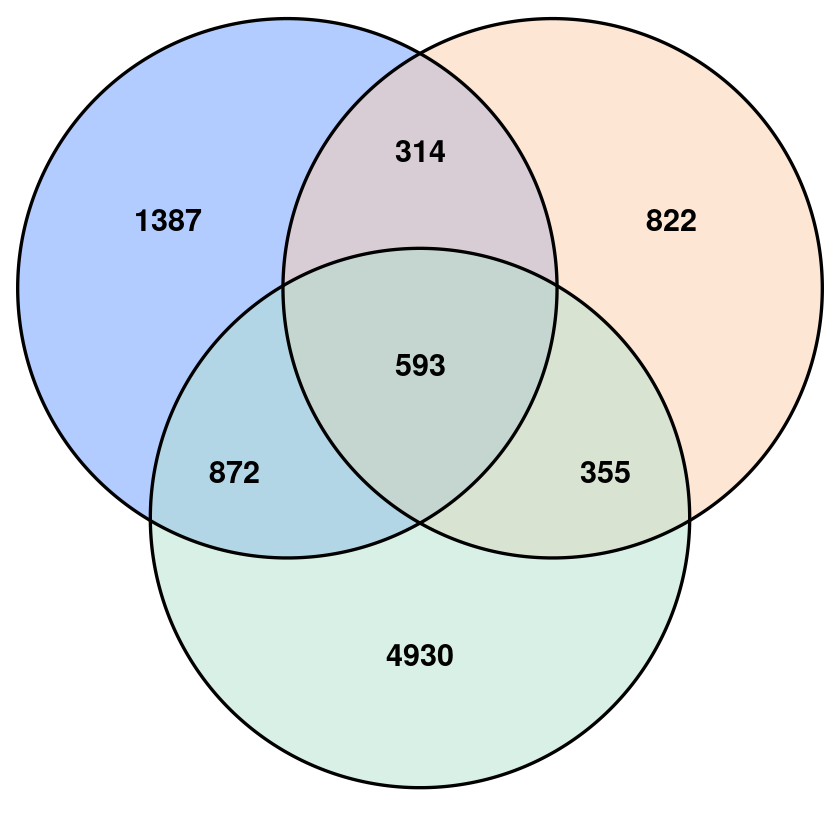

In [18]:
myCol <- c("#6699FF", "#fdcdac", "#b3e2cd")
# area1, area2, area3, n12, n23, n13, n123
venn.plot <- draw.triple.venn(3166, 2084, 6750, 907, 948, 1465, 593, 
                              fill = myCol,
                              alpha = c(.5,.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",7),
                              category = c("", "", ""), 
                              scaled = TRUE)
pdf("../../eqtl_new/figures/tri_h2.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

In [ ]:
sum(tri1_h2$Cis_h2 > 0.05)
sum(tri2_h2$Cis_h2 > 0.05)
sum(adult$Cis_h2 > 0.05)

tri1_sig <- tri1_h2 %>% filter(P_val < 0.05)
tri2_sig <- tri2_h2 %>% filter(P_val < 0.05)
adult_sig <- adult %>% filter(P_val < 0.05)

png 
  2

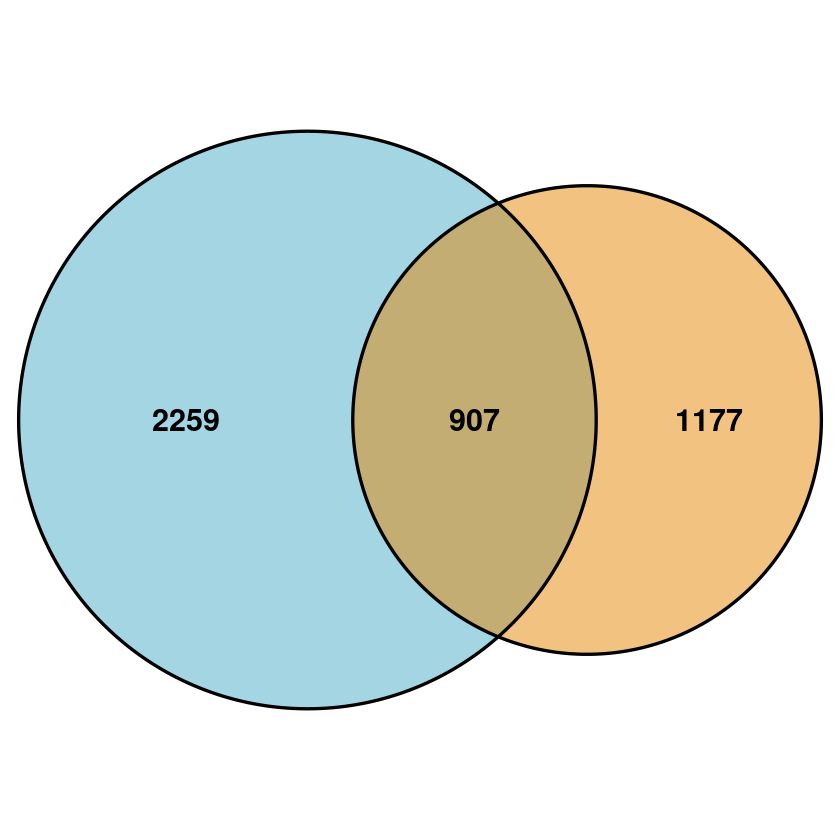

In [11]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(3166, 2084, 907, 
                              fill = c("#46ACC8", "#E58601"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../../eqtl_new/figures/tri_h2.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

In [3]:
tri1 <- tri1_h2 %>% inner_join(tri2_h2, by = "ID") %>% select(ID, Cis_h2.x, Trans_h2.x, SNP_h2.x)
tri2 <- tri2_h2 %>% inner_join(tri1_h2, by = "ID") %>% select(ID, Cis_h2.x, Trans_h2.x, SNP_h2.x)

In [4]:
h2 <- rbind(tri1, tri2)
h2$group <- c(rep("Trimester 1", nrow(tri1)), rep("Trimester 2", nrow(tri2)))

In [6]:
head(h2)

,ID,Cis_h2.x,Trans_h2.x,SNP_h2.x,group
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000000419,0.038493,0.088488,0.126981,Trimester 1
2,ENSG00000000457,0.032494,0.967503,0.999997,Trimester 1
3,ENSG00000000460,0.252903,0.348582,0.601485,Trimester 1
4,ENSG00000000938,0.140592,0.189627,0.330219,Trimester 1
5,ENSG00000000971,0.008842,0.884188,0.893030,Trimester 1
6,ENSG00000001036,0.007206,0.514717,0.521923,Trimester 1


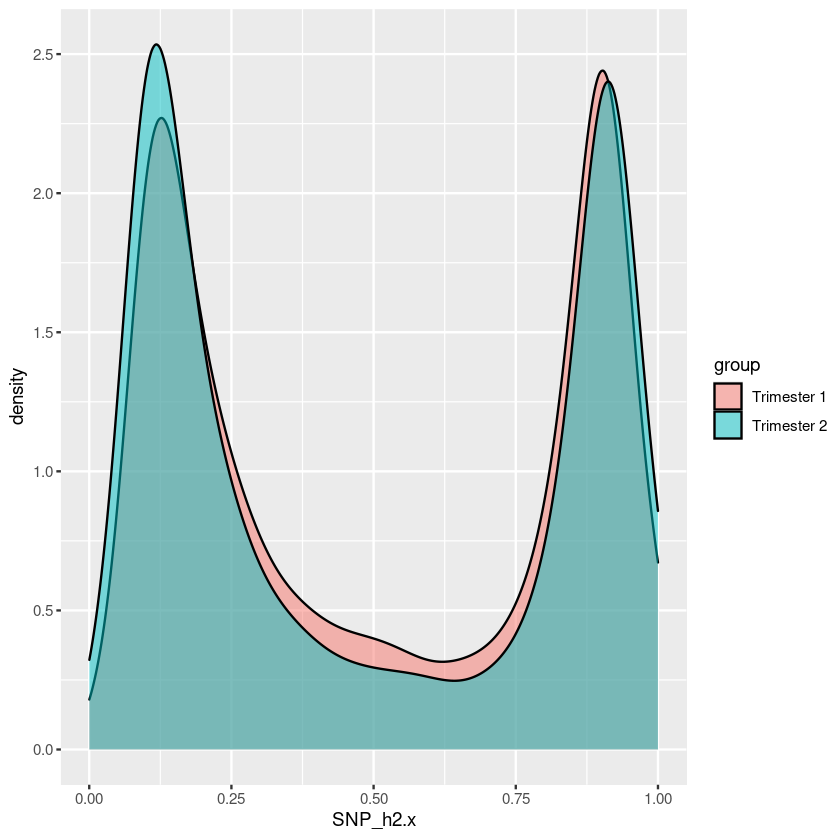

In [7]:
p <- ggplot(h2, aes(x = SNP_h2.x, fill = group)) +
    geom_density(alpha = 0.5)
p

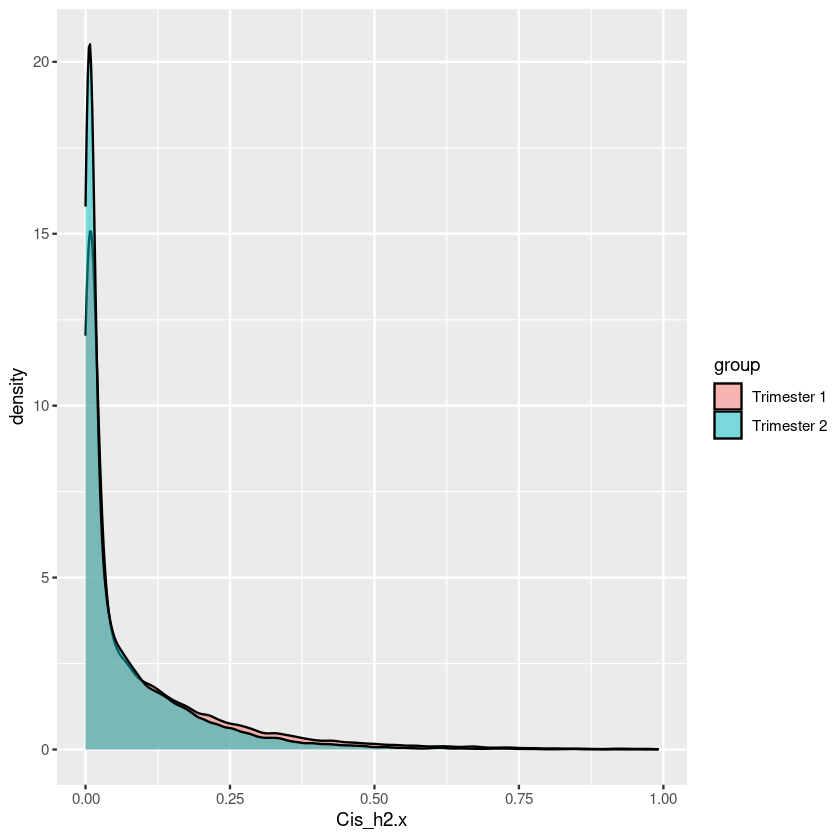

In [5]:
p <- ggplot(h2, aes(x = Cis_h2.x, fill = group)) +
    geom_density(alpha = 0.5)
p

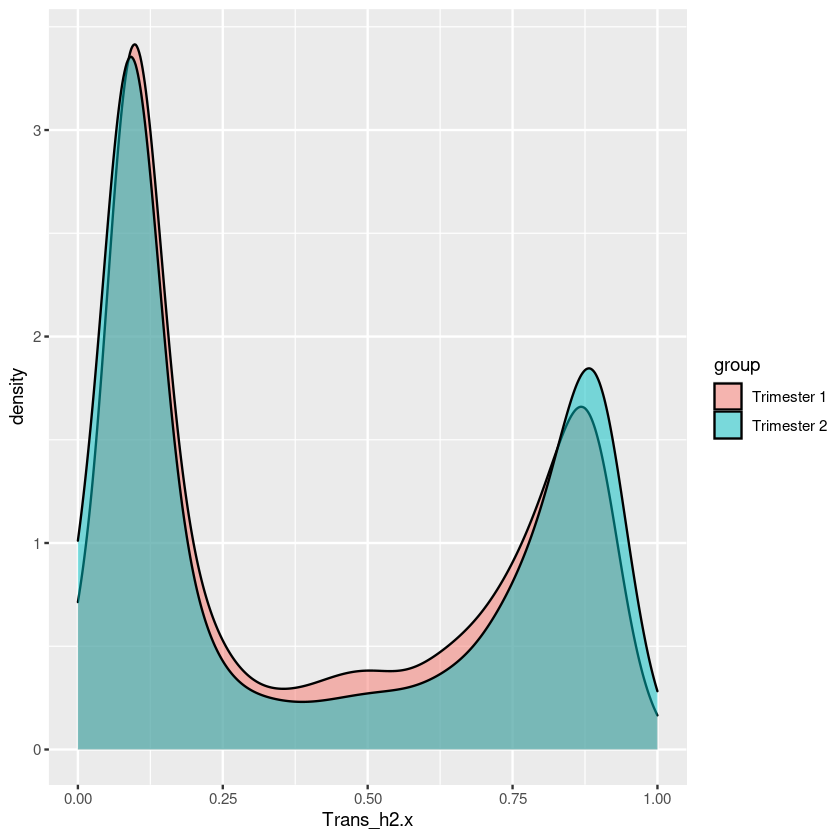

In [16]:
p <- ggplot(h2, aes(x = Trans_h2.x, fill = group)) +
    geom_density(alpha = 0.5)
p

In [17]:
dim(tri1_h2)
dim(tri2_h2)

[1] 31523    17

[1] 31531    17

In [18]:
mean(tri1_h2$Cis_h2)
mean(tri2_h2$Cis_h2)
median(tri1_h2$Cis_h2)
median(tri2_h2$Cis_h2)

[1] 0.09872257

[1] 0.07390155

[1] 0.03183

[1] 0.02222

In [19]:
wilcox.test(tri1_h2$Cis_h2, tri2_h2$Cis_h2, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  tri1_h2$Cis_h2 and tri2_h2$Cis_h2
W = 543086462, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


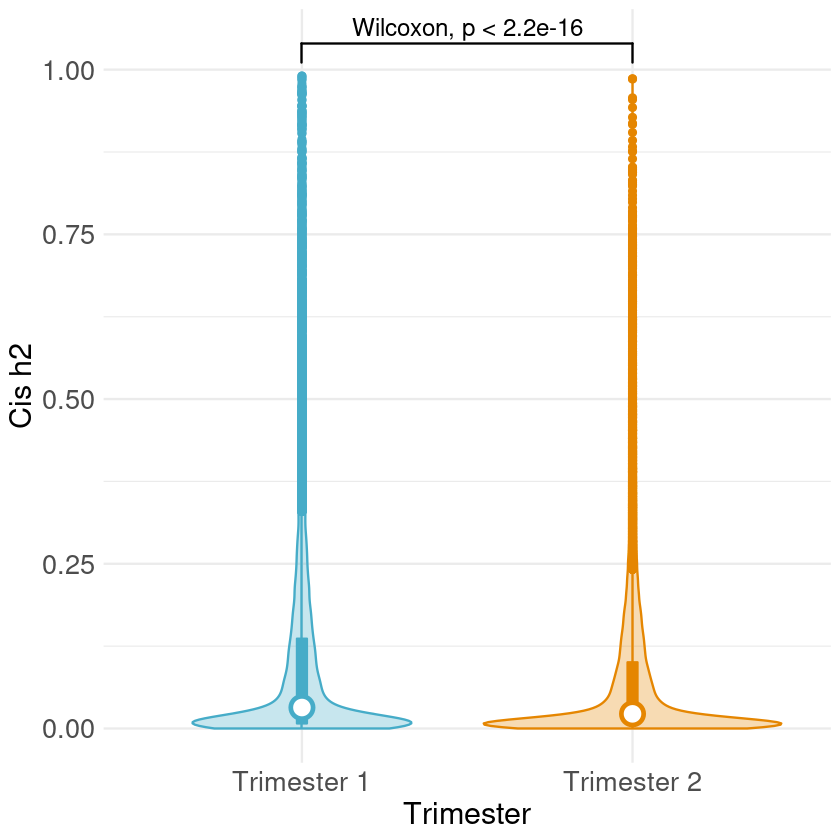

In [15]:
p <- ggplot(h2, aes(x = group, y = Cis_h2.x, fill = group)) +
    geom_violin(alpha = 0.3, trim = TRUE, aes(color = group)) +
    geom_boxplot(width = 0.03, aes(color = group)) +
    labs(x = "Trimester", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    scale_fill_manual(values = c("#46ACC8", "#E58601")) +
    scale_color_manual(values = c("#46ACC8", "#E58601")) +
    stat_summary(fun = median, aes(color = group), geom = "point", 
                         shape = 21, size = 5, show.legend = FALSE, fill = "white", stroke = 1.5) +
    geom_signif(
        comparisons = list(c("Trimester 1", "Trimester 2")),
        annotation = "Wilcoxon, p < 2.2e-16",
        textsize = 5
  )

p

In [16]:
ggsave("../figures/tri_cis_h2.pdf", width = 6, height = 6)

In [8]:
h2_scatter <- tri1 %>% inner_join(tri2, by = "ID")
head(h2_scatter)

,ID,Cis_h2.x.x,Trans_h2.x.x,SNP_h2.x.x,Cis_h2.x.y,Trans_h2.x.y,SNP_h2.x.y
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000419,0.038493,0.088488,0.126981,0.040520,0.061355,0.101875
2,ENSG00000000457,0.032494,0.967503,0.999997,0.081111,0.073336,0.154447
3,ENSG00000000460,0.252903,0.348582,0.601485,0.304154,0.073436,0.377590
4,ENSG00000000938,0.140592,0.189627,0.330219,0.006086,0.142409,0.148495
5,ENSG00000000971,0.008842,0.884188,0.893030,0.018635,0.900914,0.919549
6,ENSG00000001036,0.007206,0.514717,0.521923,0.013204,0.859694,0.872899


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



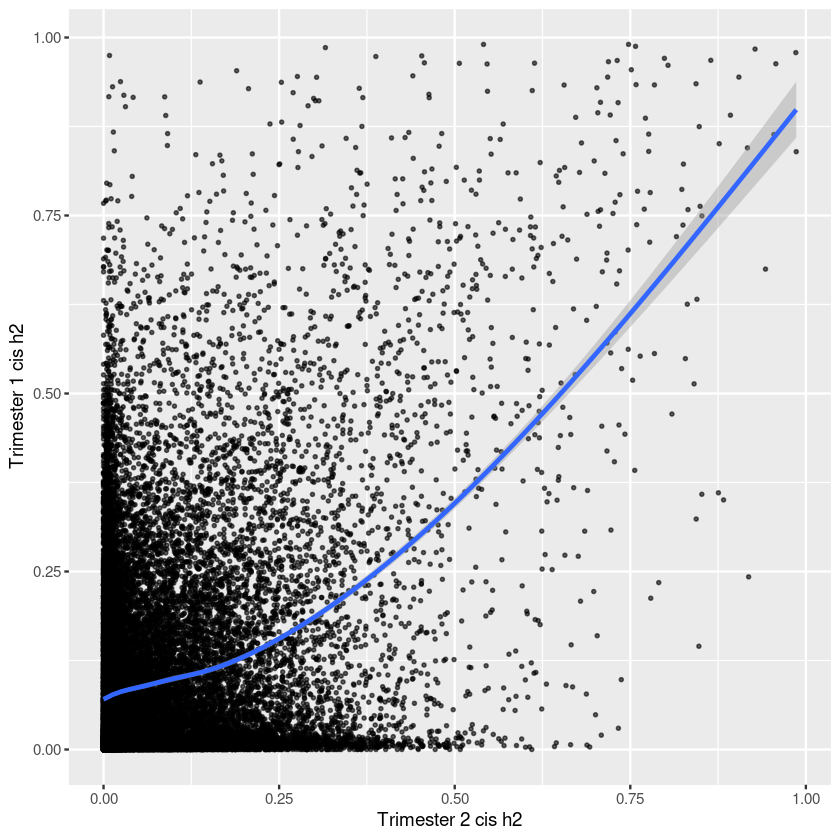

In [12]:
p <- ggplot(h2_scatter, aes(y = Cis_h2.x.x, x = Cis_h2.x.y)) +
    geom_point(alpha = 0.6, size = 0.5) +
    geom_smooth() +
    labs(x = "Trimester 2 cis h2", y = "Trimester 1 cis h2")
p